In [19]:
from konlpy.tag import Twitter

# twitter 객체를 생성
twitter=Twitter()

# pos 메소드로 형태소 분석(norm 옵션 : 단어 변환, stem 옵션 : 원형 단어 변환)
# norm 옵션 : "그래욬ㅋㅋㅋㅋ?" -> "그래요" 변환, stem 옵션 : "그렇다" 변환
malist=twitter.pos("아버지 가방에 들어가신다.", norm=True, stem=True)
print(malist)

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가다', 'Verb'), ('.', 'Punctuation')]


C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [26]:
from konlpy.tag import Okt

# twitter 객체를 생성
Ok=Okt()

# pos 메소드로 형태소 분석(norm 옵션 : 단어 변환, stem 옵션 : 원형 단어 변환)
# norm 옵션 : "그래욬ㅋㅋㅋㅋ?" -> "그래요" 변환, stem 옵션 : "그렇다" 변환
malist=Ok.nouns("아버지 가방에 들어가신다.")
print(malist)

['아버지', '가방']


In [6]:
from konlpy.tag import Twitter, Okt, Komoran, Hannanum, Kkma

# 이 중에 뭐가 엄청 좋다라고 말하긴 애매. 경험상 더 좋은거 그냥 선택하기!!
twitter=Twitter(); ok=Okt(); kmr=Komoran; hnn=Hannanum(); kma=Kkma()


C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [17]:
import time
from konlpy.tag import Twitter, Okt, Komoran, Hannanum, Kkma

# twitter 객체를 생성
twitter=Twitter(); ok=Okt(); kmr=Komoran; hnn=Hannanum(); kma=Kkma()
# 이 중에 뭐가 엄청 좋다라고 말하긴 애매. 경험상 더 좋은거 그냥 선택하기!!

start=time.time() # 시작 시간 저장 
malist=twitter.morphs("아버지 가방에 들어가신다.")
print(malist)
print("time : ", time.time()-start) # 현재시각 -시작시간 = 실행시간

start=time.time() # 시작 시간 저장 
malist=ok.morphs("아버지 가방에 들어가신다.")
print(malist)
print("time : ", time.time()-start) # 현재시각 -시작시간 = 실행시간

start=time.time() # 시작 시간 저장 
malist=hnn.morphs("아버지 가방에 들어가신다.")
print(malist)
print("time : ", time.time()-start) # 현재시각 -시작시간 = 실행시간

start=time.time() # 시작 시간 저장 
malist=kma.morphs("아버지 가방에 들어가신다.")
print(malist)
print("time : ", time.time()-start) # 현재시각 -시작시간 = 실행시간

['아버지', '가방', '에', '들어가신다', '.']
time :  0.001995086669921875
['아버지', '가방', '에', '들어가신다', '.']
time :  0.001993894577026367
['아버지', '가방', '에', '들', '어', '가', '시ㄴ다', '.']
time :  0.001993417739868164
['아버지', '가방', '에', '들어가', '시', 'ㄴ다', '.']
time :  0.010970354080200195


In [14]:
from konlpy.tag import Okt

# twitter 객체를 생성
twitter=Okt()

# pos 메소드로 형태소 분석(norm 옵션 : 단어 변환, stem 옵션 : 원형 단어 변환)
# norm 옵션 : "그래욬ㅋㅋㅋㅋ?" -> "그래요" 변환, stem 옵션 : "그렇다" 변환
malist=twitter.pos("아버지 가방에 들어가신다.", norm=True, stem=True)
print(malist)

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가다', 'Verb'), ('.', 'Punctuation')]


In [9]:
import codecs
from bs4 import BeautifulSoup
from konlpy.tag import Twitter

# utf-16 인코딩으로 파일을 열고 글자를 출력하기
fp=codecs.open("class_data/ch02/BEXX0003.txt","r",encoding="utf-16")
soup=BeautifulSoup(fp,"html.parser")
body=soup.select_one("body>text")
text=body.getText()

# 텍스트를 한 줄씩 처리하기
twitter=Twitter()
word_dic={}
lines=text.split("\n")

for line in lines:
    malist=twitter.pos(line)
    print(malist)
    for word in malist:
        if word[1]=="Noun": # 명사 확인하기
            if not(word[0] in word_dic):
                word_dic[word[0]]=0
            word_dic[word[0]]+=1 # 카운트하기 
            
# 많이 사용된 명사 출력하기
keys=sorted(word_dic.items(),key=lambda x:x[1],reverse=True)
for word, count in keys[:50]:
    print("{0}({1})".format(word, count),end="")
print()

[]
[('제', 'Noun'), ('1', 'Number'), ('편', 'Noun'), ('어둠', 'Noun'), ('의', 'Josa'), ('발', 'Noun'), ('소리', 'Noun')]
[('서', 'Verb'), ('(', 'Punctuation'), ('序', 'Foreign'), (')', 'Punctuation')]
[('1897년', 'Number'), ('의', 'Foreign'), ('한가위', 'Noun'), ('.', 'Punctuation')]
[('까치', 'Noun'), ('들', 'Suffix'), ('이', 'Josa'), ('울타리', 'Noun'), ('안', 'Noun'), ('감나무', 'Noun'), ('에', 'Josa'), ('와서', 'Verb'), ('아침', 'Noun'), ('인사', 'Noun'), ('를', 'Josa'), ('하기도', 'Verb'), ('전', 'Noun'), ('에', 'Josa'), (',', 'Punctuation'), ('무색', 'Noun'), ('옷', 'Noun'), ('에', 'Josa'), ('댕기', 'Noun'), ('꼬리', 'Noun'), ('를', 'Josa'), ('늘', 'Noun'), ('인', 'Josa'), ('아이', 'Noun'), ('들', 'Suffix'), ('은', 'Josa'), ('송편', 'Noun'), ('을', 'Josa'), ('입', 'Noun'), ('에', 'Josa'), ('물', 'Noun'), ('고', 'Josa'), ('마을', 'Noun'), ('길', 'Noun'), ('을', 'Josa'), ('쏘다니며', 'Verb'), ('기뻐서', 'Adjective'), ('날뛴다', 'Verb'), ('.', 'Punctuation'), ('어른', 'Noun'), ('들', 'Suffix'), ('은', 'Josa'), ('해', 'Noun'), ('가', 'Josa'), ('중천', 'Noun'), ('에서

[('"', 'Punctuation'), ('누가', 'Noun'), ('애', 'Noun'), ('를', 'Josa'), ('믹', 'Noun'), ('이고', 'Josa'), ('싶어서', 'Verb'), ('믹이', 'Noun'), ('는', 'Josa'), ('기요', 'Noun'), ('."', 'Punctuation')]
[('"', 'Punctuation'), ('말', 'Noun'), ('마라', 'Adjective'), ('.', 'Punctuation'), ('소가', 'Noun'), ('죽었', 'Verb'), ('심다', 'Verb'), ('.', 'Punctuation'), ('다리', 'Noun'), ('를', 'Josa'), ('뿌', 'Noun'), ('라서', 'Josa'), ('일', 'Noun'), ('못', 'VerbPrefix'), ('했', 'Verb'), ('심다', 'Verb'), ('.', 'Punctuation'), ('혼사', 'Noun'), ('가', 'Josa'), ('있어', 'Adjective'), ('장리', 'Noun'), ('빚', 'Noun'), ('을', 'Josa'), ('냈', 'Verb'), ('심다', 'Verb'), ('.', 'Punctuation'), ('나중', 'Noun'), ('에는', 'Josa'), ('무슨', 'Noun'), ('핑계', 'Noun'), ('를', 'Josa'), ('댈', 'Verb'), ('기', 'Noun'), ('든', 'Josa'), ('고', 'Noun'), ('?"', 'Punctuation')]
[('그러나', 'Conjunction'), ('김', 'Noun'), ('서방', 'Noun'), ('을', 'Josa'), ('넘', 'Verb'), ('보고', 'Noun'), ('있는', 'Adjective'), ('상대', 'Noun'), ('는', 'Josa')]
[('"', 'Punctuation'), ('내', 'Noun'), ('가', 

[('"', 'Punctuation'), ('애기', 'Noun'), ('씨', 'Suffix'), ('."', 'Punctuation')]
[('감싸듯이', 'Verb'), ('서희', 'Noun'), ('를', 'Josa'), ('안았다', 'Verb'), ('.', 'Punctuation'), ('헛구역질', 'Noun'), ('은', 'Josa'), ('딸꾹질', 'Noun'), ('로', 'Josa'), ('변했다', 'Adjective'), ('.', 'Punctuation'), ('눈', 'Noun'), ('에', 'Josa'), ('눈물', 'Noun'), ('이', 'Josa'), ('그렁그렁', 'Adverb'), ('돌았다', 'Verb'), ('.', 'Punctuation')]
[('"', 'Punctuation'), ('애기', 'Noun'), ('씨', 'Suffix'), ('."', 'Punctuation')]
[('치마', 'Noun'), ('를', 'Josa'), ('걷어서', 'Verb'), ('봉', 'Noun'), ('순이', 'Noun'), ('는', 'Josa'), ('서희', 'Noun'), ('의', 'Josa'), ('눈물', 'Noun'), ('을', 'Josa'), ('닦아', 'Verb'), ('준다', 'Verb'), ('.', 'Punctuation')]
[('2', 'Number'), ('장', 'Noun'), ('추적', 'Noun')]
[('눈코', 'Noun'), ('뜰', 'Noun'), ('사이', 'Noun'), ('없이', 'Adverb'), ('바빴던', 'Adjective'), ('하루', 'Noun'), ('해', 'Noun'), ('가', 'Josa'), ('저물었다', 'Verb'), ('.', 'Punctuation'), ('오늘이', 'Noun'), ('고비', 'Noun'), ('였던가', 'Verb'), ('.', 'Punctuation'), ('행랑', 'Noun'), ('

[('삼수', 'Noun'), ('는', 'Josa'), ('지껄이는', 'Verb'), ('돌이', 'Noun'), ('를', 'Josa'), ('내버려', 'Verb'), ('두고', 'Verb'), ('급히', 'Adjective'), ('구천이', 'Noun'), ('를', 'Josa'), ('쫓아', 'Verb'), ('달려간다', 'Verb'), ('.', 'Punctuation'), ('돌이', 'Noun'), ('도', 'Josa'), ('뒤따라서', 'Verb'), ('달려가기는', 'Verb'), ('한다', 'Verb'), ('.', 'Punctuation'), ('누각', 'Noun'), ('앞', 'Noun'), ('에까지', 'Josa'), ('간', 'Noun'), ('구천이', 'Noun'), ('는', 'Josa'), ('누각', 'Noun'), ('옆', 'Noun'), ('에', 'Josa'), ('좀', 'Noun'), ('내려앉은', 'Verb'), ('곳', 'Noun'), (',', 'Punctuation'), ('그러니까', 'Adverb'), ('누각', 'Noun'), ('앞', 'Noun'), ('의', 'Josa'), ('펑퍼짐한', 'Adjective'), ('공지', 'Noun'), ('에서', 'Josa'), ('돌', 'Noun'), ('계단', 'Noun'), ('세', 'Noun'), ('층', 'Noun'), ('으로', 'Josa'), ('내리막', 'Noun'), ('이', 'Josa'), ('된', 'Verb'), ('곳', 'Noun'), ('인데', 'Josa'), ('그', 'Determiner'), ('곳', 'Noun'), ('을', 'Josa'), ('내려다보는', 'Verb'), ('것', 'Noun'), ('이었다', 'Verb'), ('.', 'Punctuation'), ('달빛', 'Noun'), ('이', 'Josa'), ('밝아서', 'Verb'), ('선', 'Noun'

[('그것', 'Noun'), ('은', 'Josa'), ('어릴', 'Verb'), ('적의', 'Noun'), ('일', 'Noun'), ('이었다', 'Verb'), ('.', 'Punctuation'), ('운봉', 'Noun'), ('에', 'Josa'), ('살았을', 'Verb'), ('때', 'Noun'), ('본', 'Verb'), ('일', 'Noun'), ('을', 'Josa'), (',', 'Punctuation'), ('사십이', 'Noun'), ('다', 'Adverb'), ('된', 'Verb'), ('지금', 'Noun'), ('까지', 'Josa'), ('봉', 'Noun'), ('순', 'Modifier'), ('네', 'Noun'), ('는', 'Josa'), ('똑똑히', 'Adjective'), ('기억', 'Noun'), ('하고', 'Josa'), ('있다', 'Adjective'), ('.', 'Punctuation'), ('보리', 'Noun'), ('가', 'Josa'), ('필', 'Noun'), ('무렵', 'Noun'), ('이었던', 'Verb'), ('것', 'Noun'), ('같다', 'Adjective'), ('.', 'Punctuation'), ('마을', 'Noun'), ('사람', 'Noun'), ('들', 'Suffix'), ('이', 'Josa'), ('뒷산', 'Noun'), ('으로', 'Josa'), ('몰려가기에', 'Verb'), ('봉', 'Noun'), ('순', 'Modifier'), ('네', 'Noun'), ('도', 'Josa'), ('따라갔었는데', 'Verb'), ('구', 'Modifier'), ('경', 'Modifier'), ('거리', 'Noun'), ('는', 'Josa'), ('염', 'Noun'), ('진사', 'Noun'), ('댁', 'Noun'), ('종', 'Noun'), ('의', 'Josa'), ('시체', 'Noun'), ('였다', 'Verb'

[('"', 'Punctuation'), ('엄마', 'Noun'), ('데려와', 'Verb'), ('!', 'Punctuation'), ('엄마', 'Noun'), ('데려와아', 'Verb'), ('!"', 'Punctuation')]
[('발광하고', 'Adjective'), ('울부짖고', 'Verb'), ('까무러', 'Noun'), ('치고', 'Josa'), ('아무', 'Modifier'), ('거나', 'Noun'), ('잡히는', 'Verb'), ('대로', 'Noun'), ('집어던지고', 'Verb'), (',', 'Punctuation'), ('그칠', 'Verb'), ('줄', 'Noun'), ('모르는', 'Verb'), ('서희', 'Noun'), ('의', 'Josa'), ('패악', 'Noun'), ('은', 'Josa'), ('참으로', 'Noun'), ('감당', 'Noun'), ('하기', 'Verb'), ('어려운', 'Adjective'), ('것', 'Noun'), ('이었다', 'Verb'), ('.', 'Punctuation'), ('봉', 'Noun'), ('순', 'Modifier'), ('네', 'Noun'), ('는', 'Josa'), ('넋', 'Noun'), ('빠진', 'Verb'), ('것', 'Noun'), ('같았고', 'Adjective'), ('비대', 'Noun'), ('했던', 'Verb'), ('몸', 'Noun'), ('이', 'Josa'), ('홀쪽', 'Noun'), ('해졌을', 'Verb'), ('지경', 'Noun'), ('이다', 'Josa'), ('.', 'Punctuation')]
[("'", 'Punctuation'), ('말귀', 'Noun'), ('를', 'Josa'), ('알아야', 'Verb'), ('타일러', 'Noun'), ('보제', 'Noun'), ('.', 'Punctuation'), ('내', 'Noun'), ('가', 'Josa'), ('이', 'D

[('하는', 'Verb'), ('품도', 'Verb'), ('침착하거니와', 'Adjective'), ('이야기', 'Noun'), ('의', 'Josa'), ('내용', 'Noun'), ('도', 'Josa'), ('조리', 'Noun'), ('가', 'Josa'), ('있었다', 'Adjective'), ('.', 'Punctuation'), ('냉랭하게', 'Adjective'), ('바라보는', 'Verb'), ('눈빛', 'Noun'), ('은', 'Josa'), ('봉', 'Noun'), ('순', 'Modifier'), ('네', 'Noun'), ('를', 'Josa'), ('위압', 'Noun'), ('했다', 'Verb'), ('.', 'Punctuation')]
[('"', 'Punctuation'), ('머', 'Noun'), (',', 'Punctuation'), ('머', 'Noun'), ('?', 'Punctuation'), ('머라꼬', 'Noun'), ('?"', 'Punctuation')]
[('봉순', 'Noun'), ('네', 'Josa'), ('쪽', 'Noun'), ('에서', 'Josa'), ('당황', 'Noun'), ('하여', 'Verb'), ('말', 'Noun'), ('을', 'Josa'), ('더듬었다', 'Verb'), ('.', 'Punctuation'), ('적반하장', 'Noun'), ('도', 'Josa'), ('푼수가', 'Verb'), ('있지', 'Adjective'), (',', 'Punctuation'), ('기분', 'Noun'), ('은', 'Josa'), ('그랬으나', 'Adjective'), ('봉', 'Noun'), ('순', 'Modifier'), ('네', 'Noun'), ('는', 'Josa'), ('입', 'Noun'), ('밖에', 'Josa'), ('말', 'Noun'), ('이', 'Josa'), ('나오지를', 'Verb'), ('않았다', 'Verb'), ('.',

[('"', 'Punctuation'), ('아이', 'Noun'), ('구매', 'Noun'), (',', 'Punctuation'), ('일', 'Noun'), ('많이', 'Adverb'), ('하싰', 'Noun'), ('구마', 'Noun'), ('.', 'Punctuation'), ('밤', 'Noun'), ('에는', 'Josa'), ('잠도', 'Noun'), ('안', 'Noun'), ('잤는가', 'Verb'), ('배', 'Noun'), ('요', 'Josa'), ('."', 'Punctuation'), ('강청댁', 'Noun'), ('이', 'Josa'), ('허리', 'Noun'), ('를', 'Josa'), ('펴며', 'Verb'), ('삽짝', 'Noun'), ('을', 'Josa'), ('들어오는', 'Verb'), ('칠성', 'Noun'), ('이', 'Suffix'), ('에게', 'Josa'), ('말', 'Noun'), ('을', 'Josa'), ('건넸다', 'Verb'), ('.', 'Punctuation')]
[('"', 'Punctuation'), ('할', 'Verb'), ('짓', 'Noun'), ('다', 'Noun'), ('하고도', 'Josa'), ('요새', 'Noun'), ('밤', 'Noun'), ('이사', 'Noun'), ('오뉴월', 'Noun'), ('엿', 'Modifier'), ('가락', 'Noun'), ('맹', 'Noun'), ('쿠로', 'Noun'), ('얼매', 'Noun'), ('든지', 'Josa'), ('늘어지', 'Verb'), ('더마', 'Adjective'), ('."', 'Punctuation'), ('시큰둥하게', 'Adjective'), ('대답', 'Noun'), ('하며', 'Verb'), ('칠성', 'Noun'), ('이', 'Suffix'), ('는', 'Josa'), ('둥그스름하게', 'Adjective'), ('삼줄에다', 'Verb'), ('꿴

[('"', 'Punctuation'), ('내사', 'Noun'), ('아', 'Exclamation'), ('둑', 'Noun'), ('바둑', 'Noun'), ('해볼라', 'Verb'), ('누', 'Noun'), ('만', 'Josa'), ('.', 'Punctuation'), ('머', 'Noun'), ('최', 'Noun'), ('참판', 'Noun'), ('네', 'Suffix'), ('도', 'Josa'), ('옛날', 'Noun'), ('옛적', 'Noun'), ('고래', 'Noun'), ('적', 'Suffix'), ('부터', 'Josa'), ('만석꾼', 'Noun'), ('이', 'Josa'), ('더', 'Noun'), ('나', 'Josa'), ('?', 'Punctuation'), ('조상', 'Noun'), ('적', 'Noun'), ('에', 'Josa'), ('백성', 'Noun'), ('들', 'Suffix'), ('피', 'Noun'), ('빨', 'Noun'), ('아', 'Josa'), ('모', 'Modifier'), ('운', 'Noun'), ('재물', 'Noun'), ('아니가', 'Adjective'), ('.', 'Punctuation'), ('흉년', 'Noun'), ('에는', 'Josa'), ('보리', 'Noun'), ('한', 'Verb'), ('말', 'Noun'), ('에', 'Josa'), ('논', 'Noun'), ('뺏아서', 'Verb'), ('모', 'Modifier'), ('운', 'Noun'), ('재물', 'Noun'), ('아니가', 'Adjective'), ('.', 'Punctuation'), ('옛적', 'Noun'), ('에는', 'Josa'), ('선비', 'Noun'), ('들', 'Suffix'), ('이', 'Josa'), ('이', 'Noun'), ('마을', 'Noun'), ('을', 'Josa'), ('지날', 'Verb'), ('때', 'Noun'), ('

[('"', 'Punctuation'), ('머', 'Noun'), ('살', 'Noun'), ('기이', 'Noun'), ('있다고', 'Adjective'), ('장', 'Noun'), ('에는', 'Josa'), ('가요', 'Noun'), ('!', 'Punctuation'), ('핑계', 'Noun'), ('가', 'Josa'), ('좋지', 'Adjective'), ('.', 'Punctuation'), ('장날', 'Noun'), ('만', 'Josa'), ('되', 'Verb'), ('믄', 'Modifier'), ('그눔', 'Noun'), ('의', 'Josa'), ('구신', 'Noun'), ('이', 'Josa'), ('불러내는가', 'Verb'), ('환장한다니까', 'Adjective'), ('.', 'Punctuation'), ('핑계', 'Noun'), ('가', 'Josa'), ('좋지', 'Adjective'), ('!"', 'Punctuation')]
[('안달', 'Noun'), ('복', 'Noun'), ('달하지만', 'Verb'), ('그런다고', 'Adjective'), ('장', 'Noun'), ('에', 'Josa'), ('안', 'Noun'), ('갈', 'Verb'), ('용이', 'Noun'), ('는', 'Josa'), ('아니었다', 'Adjective'), ('.', 'Punctuation')]
[('"', 'Punctuation'), ('그', 'Determiner'), ('년', 'Noun'), ('개눈', 'Noun'), ('같은', 'Adjective'), ('눈', 'Noun'), ('깔', 'Verb'), ('!', 'Punctuation'), ('멋', 'Noun'), ('이', 'Josa'), ('좋다고', 'Adjective'), ('!"', 'Punctuation')]
[('겨우', 'Noun'), ('삽짝', 'Noun'), ('에서', 'Josa'), ('떠난', 'Verb'), (

[('"', 'Punctuation'), ('구천이', 'Noun'), ('도', 'Josa'), ('그냥', 'Noun'), ('상', 'Noun'), ('사람', 'Noun'), ('은', 'Josa'), ('아니라', 'Adjective'), ('카드', 'Noun'), ('마는', 'Noun'), ('.', 'Punctuation'), ('무주', 'Noun'), ('구천동', 'Noun'), ('암자', 'Noun'), ('에서', 'Josa'), ('글공부', 'Noun'), ('를', 'Josa'), ('했다', 'Verb'), ('카', 'Noun'), ('기도', 'Noun'), ('하고', 'Verb'), ('."', 'Punctuation')]
[('강청댁', 'Noun'), ('한테', 'Josa'), ('수모', 'Noun'), ('를', 'Josa'), ('당했음에도', 'Adjective'), ('임', 'Noun'), ('이네', 'Josa'), ('의', 'Noun'), ('관심', 'Noun'), ('은', 'Josa'), ('여전히', 'Adjective'), ('구천이', 'Noun'), ('에게', 'Josa'), ('있었다', 'Adjective'), ('.', 'Punctuation'), ('비워', 'Verb'), ('버린', 'Verb'), ('국수', 'Noun'), ('대접', 'Noun'), ('을', 'Josa'), ('웃목', 'Noun'), ('에', 'Josa'), ('밀어', 'Verb'), ('붙인', 'Verb'), ('강청댁', 'Noun'), ('은', 'Josa'), ('끈덕', 'Noun'), ('지게', 'Noun'), ('도', 'Josa'), ('다시', 'Noun'), ('시비', 'Noun'), ('를', 'Josa'), ('걸어왔다', 'Verb'), ('.', 'Punctuation')]
[('"', 'Punctuation'), ('글공부', 'Noun'), ('는', 'Josa

[('비웃었다', 'Verb'), ('.', 'Punctuation'), ('올해', 'Noun'), ('들어', 'Verb'), ('서울', 'Noun'), ('서는', 'Verb'), ('정부', 'Noun'), ('전복', 'Noun'), ('을', 'Josa'), ('모의', 'Noun'), ('하다가', 'Verb'), ('발각', 'Noun'), ('된', 'Verb'), ('사건', 'Noun'), ('이', 'Josa'), ('두', 'Noun'), ('번인', 'Noun'), ('가', 'Josa'), ('있었다', 'Adjective'), ('.', 'Punctuation'), ('하나', 'Noun'), ('는', 'Josa'), ('전', 'Noun'), ('중추원', 'Noun'), ('참', 'Verb'), ('서관', 'Noun'), ('(', 'Punctuation'), ('中樞院參書官', 'Foreign'), (')', 'Punctuation'), ('한', 'Determiner'), ('선회', 'Noun'), (',', 'Punctuation'), ('친위', 'Noun'), ('연대', 'Noun'), ('(', 'Punctuation'), ('親衛聯隊', 'Foreign'), (')', 'Punctuation'), ('대대장', 'Noun'), ('이', 'Determiner'), ('근', 'Modifier'), ('용이', 'Noun'), ('중심', 'Noun'), ('이', 'Josa'), ('되어', 'Verb'), ('계획', 'Noun'), ('했다가', 'Verb'), ('실패했고', 'Adjective'), ('다시', 'Noun'), ('칠월', 'Noun'), ('에는', 'Josa'), ('전', 'Noun'), ('총', 'Modifier'), ('순', 'Noun'), ('(', 'Punctuation'), ('總巡', 'Foreign'), (')', 'Punctuation'), ('송진', 'No

[("'", 'Punctuation'), ('참판', 'Noun'), ('댁', 'Noun'), ('마님', 'Noun'), ('은', 'Josa'), ('안녕하시요', 'Adjective'), (".'", 'Punctuation')]
[('월', 'Noun'), ('선의', 'Noun'), ('목소리', 'Noun'), ('가', 'Josa'), ('바람', 'Noun'), ('을', 'Josa'), ('타고', 'Noun'), ('용이', 'Noun'), ('귓가', 'Noun'), ('를', 'Josa'), ('스쳐', 'Verb'), ('지나갔다', 'Verb'), ('.', 'Punctuation')]
[('최', 'Noun'), ('참판', 'Noun'), ('댁', 'Noun'), ('문전', 'Noun'), ('에', 'Josa'), ('이르러', 'Verb'), ('말', 'Noun'), ('에서', 'Josa'), ('내린', 'Verb'), ('문', 'Modifier'), ('의원', 'Noun'), ('은', 'Josa'), ('집안', 'Noun'), ('으로', 'Josa'), ('들어갔고', 'Verb'), ('돌이', 'Noun'), ('는', 'Josa'), ('마구간', 'Noun'), ('에', 'Josa'), ('말', 'Noun'), ('을', 'Josa'), ('넣은', 'Verb'), ('뒤', 'Noun'), ('길', 'Noun'), ('상', 'Suffix'), ('이를', 'Josa'), ('찾는다', 'Verb'), ('.', 'Punctuation')]
[('"', 'Punctuation'), ('기상', 'Noun'), ('이', 'Josa'), ('없소', 'Adjective'), ('."', 'Punctuation')]
[('김', 'Noun'), ('서방', 'Noun'), ('의', 'Josa'), ('아들', 'Noun'), ('개똥이', 'Noun'), ('녀석', 'Noun'), ('이', '

[('용이', 'Noun'), ('는', 'Josa'), ('일어서서', 'Verb'), ('두루마기', 'Noun'), ('를', 'Josa'), ('입는다', 'Verb'), ('.', 'Punctuation'), ('올이', 'Verb'), ('고르잖은데다', 'Verb'), ('파리', 'Noun'), ('똥', 'Noun'), ('같은', 'Adjective'), ('딱지', 'Noun'), ('가', 'Josa'), ('붙은', 'Verb'), ('열세', 'Noun'), ('무명', 'Noun'), ('두루마기', 'Noun'), ('는', 'Josa'), ('그러나', 'Conjunction'), ('입은', 'Verb'), ('사람', 'Noun'), ('의', 'Josa'), ('풍', 'Adverb'), ('신', 'Noun'), ('이', 'Josa'), ('좋아서', 'Adjective'), ('번', 'Noun'), ('치가', 'Noun'), ('났다', 'Verb'), ('.', 'Punctuation'), ('이미', 'Adverb'), ('망건', 'Noun'), ('은', 'Josa'), ('쓰고', 'Verb'), ('있었고', 'Adjective'), (',', 'Punctuation'), ('벽', 'Noun'), ('에', 'Josa'), ('걸린', 'Verb'), ('갓', 'Noun'), ('을', 'Josa'), ('내려서', 'Verb'), ('용이', 'Noun'), ('는', 'Josa'), ('입김', 'Noun'), ('으로', 'Josa'), ('먼지', 'Noun'), ('를', 'Josa'), ('턴다', 'Noun'), ('.', 'Punctuation')]
[('"', 'Punctuation'), ('세상', 'Noun'), ('에', 'Josa'), ('무신', 'Noun'), ('낙', 'Noun'), ('으로', 'Josa'), ('내', 'Noun'), ('가', 'Josa'), ('살꼬

[('"', 'Punctuation'), ('길', 'Noun'), ('상', 'Suffix'), ('아', 'Josa'), (',', 'Punctuation'), ('주까', 'Verb'), ('?"', 'Punctuation')]
[('"', 'Punctuation'), ('응', 'Noun'), ('."', 'Punctuation')]
[('길', 'Noun'), ('상이', 'Noun'), ('날밤', 'Noun'), ('을', 'Josa'), ('받아', 'Verb'), ('오독오독', 'Adverb'), ('씹는다', 'Verb'), ('.', 'Punctuation')]
[('"', 'Punctuation'), ('아', 'Exclamation'), ('재', 'Noun'), ('요', 'Josa'), (',', 'Punctuation'), ('문어', 'Noun'), ('다리', 'Noun'), ('드릴', 'Noun'), ('기요', 'Noun'), ('?"', 'Punctuation')]
[('용이', 'Noun'), ('도', 'Josa'), ('문어', 'Noun'), ('다리', 'Noun'), ('를', 'Josa'), ('받아', 'Verb'), ('질겅질겅', 'Noun'), ('씹는다', 'Verb'), ('.', 'Punctuation'), ('산', 'Noun'), ('그림자', 'Noun'), ('에', 'Josa'), ('가려진', 'Noun'), ('강물', 'Noun'), ('은', 'Josa'), ('암', 'Modifier'), ('록색', 'Noun'), (',', 'Punctuation'), ('짙은', 'Adjective'), ('비취', 'Noun'), ('빛깔', 'Noun'), ('이었다', 'Verb'), ('.', 'Punctuation'), ('노', 'Noun'), ('젓는', 'Verb'), ('소리', 'Noun'), ('에', 'Josa'), ('따라', 'Verb'), ('마을', 'Noun

[('"', 'Punctuation'), ('흥', 'Noun'), (',', 'Punctuation'), ('살이', 'Noun'), ('썩어서', 'Verb'), ('뭉', 'Noun'), ('개진', 'Noun'), ('문', 'Modifier'), ('둥이', 'Noun'), ('도', 'Josa'), ('양반', 'Noun'), ('은', 'Josa'), ('양반', 'Noun'), ('이라', 'Josa'), ('말', 'Noun'), ('이제', 'Noun'), ('?', 'Punctuation'), ('천하', 'Noun'), ('일색', 'Noun'), ('양귀비', 'Noun'), ('라도', 'Josa'), ('무당', 'Noun'), ('은', 'Josa'), ('무당', 'Noun'), ('이라', 'Josa'), ('말', 'Noun'), ('이제', 'Noun'), ('?', 'Punctuation'), ('흥', 'Noun'), ('."', 'Punctuation')]
[('바지', 'Noun'), ('말기', 'Noun'), ('를', 'Josa'), ('치켜', 'Verb'), ('올리고', 'Verb'), ('허리', 'Noun'), ('끈', 'Noun'), ('을', 'Josa'), ('동인', 'Noun'), ('뒤', 'Noun'), ('용이', 'Noun'), ('는', 'Josa'), ('휘청거리면서', 'Verb'), ('월', 'Noun'), ('선의', 'Noun'), ('주막', 'Noun'), ('앞', 'Noun'), ('에까지', 'Josa'), ('왔다', 'Verb'), ('.', 'Punctuation')]
[('"', 'Punctuation'), ('월선', 'Noun'), ('아', 'Josa'), ('!"', 'Punctuation')]
[('고랫땅', 'Noun'), ('같은', 'Adjective'), ('소리', 'Noun'), ('를', 'Josa'), ('질렀다', 'Verb'), (

[('한숨', 'Noun'), ('대신', 'Noun'), ('염불', 'Noun'), ('을', 'Josa'), ('왼다', 'Verb'), ('.', 'Punctuation')]
[('"', 'Punctuation'), ('어서', 'Noun'), ('해오니라고', 'Verb'), ('죽', 'Noun'), ('에', 'Josa'), ('머', 'Noun'), ('들', 'Suffix'), ('이', 'Josa'), ('생깄심다', 'Noun'), ('."', 'Punctuation')]
[('머리', 'Noun'), ('에', 'Josa'), ('불티', 'Noun'), ('를', 'Josa'), ('뒤집어', 'Verb'), ('쓰고', 'Verb'), (',', 'Punctuation'), ('생', 'Noun'), ('솔가지', 'Noun'), ('를', 'Josa'), ('지폈는가', 'Verb'), (',', 'Punctuation'), ('두', 'Determiner'), ('만', 'Modifier'), ('네', 'Noun'), ('는', 'Josa'), ('땀', 'Noun'), ('을', 'Josa'), ('뻘뻘', 'Noun'), ('흘리며', 'Verb'), ('상', 'Noun'), ('을', 'Josa'), ('들고', 'Verb'), ('들어왔다', 'Verb'), ('.', 'Punctuation'), ('깨죽', 'Noun'), ('두', 'Noun'), ('그릇', 'Noun'), ('과', 'Josa'), ('연하게', 'Adjective'), ('데', 'Noun'), ('쳐서', 'Verb'), ('갖은', 'Noun'), ('양념', 'Noun'), ('을', 'Josa'), ('넣어', 'Verb'), ('맛있게', 'Adjective'), ('무친', 'Verb'), ('산나물', 'Noun'), ('한', 'Verb'), ('보', 'Noun'), ('시기', 'Noun'), ('가', 'Josa'), ('상'

[('"', 'Punctuation'), ('그', 'Determiner'), ('놈', 'Noun'), ('의', 'Josa'), ('서가', 'Verb'), ('놈', 'Noun'), ('이', 'Josa'), (',"', 'Punctuation')]
[('하다가', 'Verb'), ('말', 'Noun'), ('을', 'Josa'), ('끝', 'Noun'), ('맺지', 'Verb'), ('못', 'Noun'), ('하고', 'Josa'), ('김훈', 'Noun'), ('장', 'Suffix'), ('은', 'Josa'), ('우물쭈물', 'Noun'), ('하는데', 'Verb'), ('윤보', 'Noun'), ('는', 'Josa'), ('얼기설기한', 'Adjective'), ('이빨', 'Noun'), ('을', 'Josa'), ('드러내고', 'Verb'), ('씩', 'Adverb'), ('웃는다', 'Verb'), ('.', 'Punctuation')]
[('"', 'Punctuation'), ('서', 'Modifier'), ('서방', 'Noun'), ('이', 'Josa'), ('마누라', 'Noun'), ('쟁이', 'Suffix'), ('업어주는', 'Verb'), ('거', 'Noun'), ('를', 'Josa'), ('보싰구마', 'Noun'), ('요', 'Josa'), ('."', 'Punctuation'), ('수숫대', 'Noun'), ('로', 'Josa'), ('엮어놓', 'Noun'), ('은', 'Josa'), (',', 'Punctuation'), ('그', 'Noun'), ('틈', 'Noun'), ('바구니', 'Noun'), ('에서', 'Josa'), ('수탉', 'Noun'), ('대가리', 'Noun'), ('가', 'Josa'), ('얼른거리는', 'Verb'), ('서금', 'Noun'), ('돌이', 'Noun'), ('네', 'Josa'), ('울타리', 'Noun'), ('를', 'Josa'

[('반나절', 'Noun'), ('을', 'Josa'), ('보리밭', 'Noun'), ('에', 'Josa'), ('엎', 'Noun'), ('디어', 'Noun'), ('풀', 'Noun'), ('을', 'Josa'), ('매', 'Modifier'), ('다가', 'Noun'), ('점심', 'Noun'), ('을', 'Josa'), ('이고', 'Josa'), ('가는', 'Verb'), ('선', 'Noun'), ('이를', 'Josa'), ('본', 'Verb'), ('함안', 'Noun'), ('댁', 'Noun'), ('은', 'Josa'), ('비실', 'Noun'), ('비실', 'Noun'), ('일어섰다', 'Verb'), ('.', 'Punctuation'), ('이번', 'Noun'), ('에는', 'Josa'), ('얼굴빛', 'Noun'), ('이', 'Josa'), ('몹시', 'Noun'), ('창백했다', 'Adjective'), ('.', 'Punctuation')]
[('"', 'Punctuation'), ('아가', 'Noun'), ('."', 'Punctuation')]
[('"', 'Punctuation'), ('야', 'Exclamation'), ('."', 'Punctuation')]
[('"', 'Punctuation'), ('아버지', 'Noun'), ('점심', 'Noun'), ('갖고', 'Verb'), ('가나', 'Noun'), ('."', 'Punctuation')]
[('"', 'Punctuation'), ('야', 'Exclamation'), ('."', 'Punctuation')]
[('"', 'Punctuation'), ('물', 'Noun'), ('있으면', 'Adjective'), ('나', 'Noun'), ('한', 'Determiner'), ('모금', 'Noun'), ('안', 'Noun'), ('줄', 'Noun'), ('래', 'Josa'), ('?"', 'Punctuation')

[('"', 'Punctuation'), ('뭐라고', 'Verb'), ('?"', 'Punctuation')]
[('어리둥절하다가', 'Adjective'), ('한참', 'Noun'), ('만에', 'Josa'), ('평산', 'Noun'), ('은', 'Josa'), ('박', 'Noun'), ('장', 'Suffix'), ('대소', 'Noun'), ('를', 'Josa'), ('했다', 'Verb'), ('.', 'Punctuation')]
[('"', 'Punctuation'), ('그', 'Noun'), (',', 'Punctuation'), ('그래', 'Adjective'), (',', 'Punctuation'), ('그걸', 'Adverb'), ('산', 'Noun'), ('요망', 'Noun'), ('스런', 'Josa'), ('계집', 'Noun'), ('년', 'Noun'), ('이', 'Josa'), ('대체', 'Noun'), ('누', 'Noun'), ('고', 'Josa'), ('?"', 'Punctuation')]
[('"', 'Punctuation'), ('그런', 'Adjective'), ('말', 'Noun'), ('안', 'Noun'), ('하기로', 'Verb'), ('했인께', 'Verb'), ('."', 'Punctuation')]
[('강', 'Noun'), ('포수', 'Noun'), ('는', 'Josa'), ('도리', 'Noun'), ('질', 'Noun'), ('을', 'Josa'), ('했다', 'Verb'), ('.', 'Punctuation'), ('그러나', 'Conjunction'), ('결국', 'Adverb'), ('평산', 'Noun'), ('은', 'Josa'), ('강', 'Noun'), ('포수', 'Noun'), ('입', 'Noun'), ('을', 'Josa'), ('열게', 'Verb'), ('하고야', 'Josa'), ('말았다', 'Verb'), ('.', 'Punctuatio

[('할', 'Verb'), ('때', 'Noun'), ('치수', 'Noun'), ('는', 'Josa'), ('소마', 'Noun'), ('보러', 'Verb'), ('가는지', 'Verb'), ('일어서서', 'Verb'), ('방', 'Noun'), ('을', 'Josa'), ('나갔다', 'Verb'), ('.', 'Punctuation')]
[('"', 'Punctuation'), ('어차피', 'Noun'), ('풍습', 'Noun'), ('이라는', 'Josa'), ('것', 'Noun'), ('은', 'Josa'), ('앞서가는', 'Verb'), ('사람', 'Noun'), ('들', 'Suffix'), ('을', 'Josa'), ('따르게', 'Verb'), ('마련', 'Noun'), ('인데', 'Josa'), ('조만간', 'Noun'), ('에', 'Josa'), (',"', 'Punctuation'), ('이동진', 'Noun'), ('이', 'Josa'), ('말', 'Noun'), ('을', 'Josa'), ('가로막았다', 'Verb'), ('.', 'Punctuation')]
[('"', 'Punctuation'), ('알맹이', 'Noun'), ('를', 'Josa'), ('모르고서', 'Verb'), ('겉', 'Noun'), ('치레', 'Noun'), ('만', 'Josa'), ('따른다고', 'Verb'), ('문명인', 'Noun'), ('이', 'Josa'), ('된다', 'Verb'), ('할', 'Verb'), ('수', 'Noun'), ('는', 'Josa'), ('없을', 'Adjective'), ('것', 'Noun'), ('같소이다', 'Adjective'), ('.', 'Punctuation'), ('이', 'Determiner'), ('거', 'Noun'), ('조공', 'Noun'), ('(', 'Punctuation'), ('趙公', 'Foreign'), (')', 'Punctuation'), 

[("'", 'Punctuation'), ('당신', 'Noun'), ('은', 'Josa'), ('대체', 'Noun'), ('멀', 'Adjective'), ('할라고', 'Verb'), ('이', 'Determiner'), ('곳', 'Noun'), ('에', 'Josa'), ('왔소', 'Verb'), ("?'", 'Punctuation')]
[('눈', 'Noun'), ('은', 'Josa'), ('그렇게', 'Adverb'), ('물었던', 'Verb'), ('것', 'Noun'), ('같았다', 'Adjective'), ('.', 'Punctuation')]
[('치수', 'Noun'), ('는', 'Josa'), ('바람', 'Noun'), ('이', 'Josa'), ('잔', 'Noun'), ('바다', 'Noun'), ('같이', 'Josa'), ('아무', 'Modifier'), ('말', 'Noun'), ('이', 'Josa'), ('없었다', 'Adjective'), ('.', 'Punctuation'), ('그', 'Noun'), ('는', 'Josa'), ('전혀', 'Noun'), ('다른', 'Noun'), ('사람', 'Noun'), ('같았다', 'Adjective'), ('.', 'Punctuation')]
[("'", 'Punctuation'), ('이자', 'Noun'), ('의', 'Josa'), ('변덕', 'Noun'), ('을', 'Josa'), ('어떻게', 'Adjective'), ('감당', 'Noun'), ('하지', 'Verb'), ('?', 'Punctuation'), ('아무튼', 'Adverb'), ('참아', 'Verb'), ('보자', 'Verb'), (".'", 'Punctuation'), ('준구', 'Noun'), ('는', 'Josa'), ('저녁', 'Noun'), ('을', 'Josa'), ('끝내자', 'Verb'), ('숭늉', 'Noun'), ('으로', 'Josa'), ('입가심

[('"', 'Punctuation'), ('서울', 'Noun'), ('서', 'Josa'), ('온', 'Noun'), ('손님', 'Noun'), ('말', 'Noun'), ('이', 'Suffix'), ('요', 'Josa'), ('."', 'Punctuation')]
[('"……"', 'Punctuation')]
[('"', 'Punctuation'), ('참', 'Verb'), ('우스', 'Noun'), ('바', 'Noun'), ('죽겄소', 'Noun'), ('.', 'Punctuation'), ('귀', 'Modifier'), ('녀', 'Noun'), ('가', 'Josa'), ('그', 'Noun'), ('라는', 'Josa'), ('데', 'Noun'), ('무신', 'Noun'), ('금관조복', 'Noun'), ('인가', 'Josa'), ('길', 'Noun'), ('상이', 'Noun'), ('더러', 'Josa'), ('옷', 'Noun'), ('을', 'Josa'), ('털고', 'Verb'), ('불', 'Noun'), ('고', 'Josa'), ('말리', 'Noun'), ('라', 'Josa'), ('카', 'Noun'), ('고', 'Josa'), ('머리', 'Noun'), ('에', 'Josa'), ('쓰는', 'Verb'), ('그것', 'Noun'), ('도', 'Josa'), ('털고', 'Verb'), ('불', 'Noun'), ('고', 'Josa'), ('말리', 'Noun'), ('라', 'Josa'), ('카더니', 'Verb'), ('신', 'Modifier'), ('주', 'Modifier'), ('단지', 'Noun'), ('위', 'Noun'), ('하', 'Suffix'), ('듯', 'Noun'), ('모시놨다', 'Verb'), ('안', 'Noun'), ('카요', 'Noun'), ('."', 'Punctuation')]
[('"', 'Punctuation'), ('제', 'Modifie

[('"', 'Punctuation'), ('한데', 'Eomi'), ('너무', 'Adverb'), ('그', 'Noun'), ('어른', 'Noun'), ('촉', 'Noun'), ('빠른', 'Adjective'), ('기이', 'Noun'), ('탈이요', 'Verb'), ('.', 'Punctuation'), ('벵', 'Noun'), ('자', 'Suffix'), ('들이사', 'Verb'), ('아무리', 'Adverb'), ('죽', 'Noun'), ('을', 'Josa'), ('벵', 'Noun'), ('을', 'Josa'), ('실어', 'Noun'), ('도', 'Josa'), ('죽', 'Noun'), ('을', 'Josa'), ('기', 'Noun'), ('라는', 'Josa'), ('생각', 'Noun'), ('은', 'Josa'), ('못', 'VerbPrefix'), ('허니께', 'Verb'), ('."', 'Punctuation')]
[('담배', 'Noun'), ('피우던', 'Verb'), ('사나이', 'Noun'), ('가', 'Josa'), ('말', 'Noun'), ('했다', 'Verb'), ('.', 'Punctuation')]
[('월', 'Noun'), ('선이도', 'Verb'), ('기억', 'Noun'), ('한', 'Josa'), ('다', 'Adverb'), (',', 'Punctuation'), ('어릴', 'Verb'), ('적', 'Noun'), ('일', 'Noun'), ('을', 'Josa'), ('.', 'Punctuation'), ('어디서', 'Adverb'), ('였던지', 'Verb'), ('발그레', 'Noun'), ('한', 'Josa'), ('환약', 'Noun'), ('을', 'Josa'), ('문', 'Modifier'), ('의원', 'Noun'), ('이', 'Josa'), ('입', 'Noun'), ('에', 'Josa'), ('넣어주던', 'Verb'), ('일', '

[('"', 'Punctuation'), ('불쌍한', 'Adjective'), ('것', 'Noun'), ('."', 'Punctuation')]
[('불길', 'Noun'), ('을', 'Josa'), ('바라보며', 'Verb'), ('중얼거렸다', 'Verb'), ('.', 'Punctuation')]
[('"', 'Punctuation'), ('나를', 'Verb'), ('바라보고', 'Verb'), ('지가', 'Verb'), ('살', 'Noun'), ('아', 'Josa'), ('?', 'Punctuation'), ('나', 'Noun'), ('한테', 'Josa'), ('서', 'Verb'), ('바랄', 'Verb'), ('기이', 'Noun'), ('머', 'Noun'), ('있노', 'Adjective'), ('.', 'Punctuation'), ('바랄', 'Verb'), ('기이', 'Noun'), ('머', 'Noun'), ('가', 'Josa'), ('있다고', 'Adjective'), (',', 'Punctuation'), ('흐음', 'Exclamation'), ('."', 'Punctuation'), ('다시', 'Noun'), ('나무', 'Noun'), ('를', 'Josa'), ('부질러', 'Adjective'), ('아궁이', 'Noun'), ('속', 'Noun'), ('에', 'Josa'), ('밀어', 'Verb'), ('넣는다', 'Verb'), ('.', 'Punctuation')]
[("'", 'Punctuation'), ('용아', 'Verb'), ('이', 'Determiner'), ('놈', 'Noun'), ('아야', 'Noun'), ('.', 'Punctuation'), ('니', 'Noun'), ('그', 'Noun'), ('초롱초롱', 'Noun'), ('한', 'Josa'), ('눈알', 'Noun'), ('이라도', 'Josa'), ('하나', 'Noun'), ('뽑았', 'Verb'), (

[('하', 'Exclamation'), ('거나', 'Noun'), ('말거나', 'Verb'), ('평산', 'Noun'), ('은', 'Josa'), ('벌써', 'Noun'), ('저만큼', 'Noun'), ('부채', 'Noun'), ('든', 'Verb'), ('손', 'Noun'), ('을', 'Josa'), ('저으', 'Noun'), ('며', 'Josa'), ('팔자걸음', 'Noun'), ('으로', 'Josa'), ('거만', 'Noun'), ('을', 'Josa'), ('떨며', 'Verb'), ('올라가고', 'Verb'), ('있었다', 'Adjective'), ('.', 'Punctuation'), ('막딸', 'Noun'), ('네', 'Josa'), ('의', 'Noun'), ('목소리', 'Noun'), ('는', 'Josa'), ('차츰', 'Adverb'), ('작아졌다', 'Verb'), ('.', 'Punctuation')]
[('"', 'Punctuation'), ('더런', 'Adjective'), ('놈으', 'Verb'), ('손', 'Noun'), ('(', 'Punctuation'), ('孫', 'Foreign'), ('),', 'Punctuation'), ('바늘', 'Noun'), ('도둑', 'Noun'), ('이', 'Josa'), ('소', 'Modifier'), ('도둑', 'Noun'), ('되', 'Verb'), ('더', 'Noun'), ('라고', 'Josa'), (',', 'Punctuation'), ('나무', 'Noun'), ('될', 'Verb'), ('거', 'Noun'), ('는', 'Josa'), ('떡잎', 'Noun'), ('부터', 'Josa'), ('아더', 'Noun'), ('라고', 'Josa'), (',', 'Punctuation'), ('이래가지고는', 'Adjective'), ('남으', 'Verb'), ('집', 'Noun'), ('자식', 'Noun'), ('

[('"', 'Punctuation'), ('뭣', 'Noun'), ('땜', 'Noun'), ('에', 'Josa'), ('오라', 'Noun'), ('고', 'Josa'), ('했소', 'Verb'), ('?"', 'Punctuation')]
[('계집', 'Noun'), ('은', 'Josa'), ('태연자약', 'Noun'), ('하게', 'Verb'), ('말', 'Noun'), ('했다', 'Verb'), ('.', 'Punctuation')]
[('"', 'Punctuation'), ('뭣', 'Noun'), ('때문', 'Noun'), ('인지', 'Josa'), ('몰랐으면', 'Verb'), ('네', 'Noun'), ('가', 'Josa'), ('여기', 'Noun'), ('왔겠나', 'Verb'), ('?"', 'Punctuation')]
[('평산', 'Noun'), ('도', 'Josa'), ('냉랭하게', 'Adjective'), ('응수', 'Noun'), ('한다', 'Verb'), ('.', 'Punctuation')]
[('"', 'Punctuation'), ('무슨', 'Noun'), ('말', 'Noun'), ('을', 'Josa'), ('하는지', 'Verb'), ('통', 'Noun'), ('모르', 'Verb'), ('겄', 'Noun'), ('구마', 'Noun'), ('요', 'Josa'), ('.', 'Punctuation'), ('가락지', 'Noun'), ('우짜', 'Noun'), ('고', 'Josa'), ('저', 'Determiner'), ('쩌', 'Noun'), ('고', 'Josa'), ('안', 'Noun'), ('하싰소', 'Noun'), ('?', 'Punctuation'), ('그렇다', 'Adjective'), ('믄', 'Modifier'), ('가락지', 'Noun'), ('가', 'Josa'), ('우', 'Adverb'), ('찌', 'Noun'), ('되었는지', 'Verb'),

[('조준', 'Noun'), ('구', 'Noun'), ('는', 'Josa'), ('최', 'Noun'), ('참판', 'Noun'), ('댁', 'Noun'), ('에', 'Josa'), ('온', 'Noun'), ('지', 'Verb'), ('보름', 'Noun'), ('만에', 'Josa'), ('부산', 'Noun'), ('을', 'Josa'), ('한', 'Verb'), ('번', 'Noun'), ('다녀왔다', 'Verb'), ('.', 'Punctuation'), ('부산', 'Noun'), ('서', 'Josa'), ('왔을', 'Verb'), ('때', 'Noun'), ('그', 'Noun'), ('는', 'Josa'), ('깨끗하게', 'Adjective'), ('이발', 'Noun'), ('을', 'Josa'), ('하고', 'Verb'), ('머리', 'Noun'), ('에는', 'Josa'), ('하얀', 'Adjective'), ('여름', 'Noun'), ('모자', 'Noun'), ('를', 'Josa'), ('쓰고', 'Verb'), ('있었다', 'Adjective'), ('.', 'Punctuation'), ('그리고', 'Conjunction'), ('다시', 'Noun'), ('보름', 'Noun'), ('을', 'Josa'), ('넘겨', 'Verb'), ('보냈는데', 'Verb'), ('서울', 'Noun'), ('로', 'Josa'), ('돌아갈', 'Verb'), ('기미', 'Noun'), ('는', 'Josa'), ('보이지', 'Noun'), ('않았다', 'Verb'), ('.', 'Punctuation'), ('치수', 'Noun'), ('가', 'Josa'), ('과', 'Noun'), ('히', 'Adverb'), ('기분', 'Noun'), ('이', 'Josa'), ('나쁘지', 'Adjective'), ('않을', 'Verb'), ('때', 'Noun'), ('는', 'Josa'), ('바둑'

[('준구', 'Noun'), ('는', 'Josa'), ('잠시', 'Noun'), ('말', 'Noun'), ('을', 'Josa'), ('끊었다', 'Verb'), ('.', 'Punctuation'), ('무슨', 'Noun'), ('생각', 'Noun'), ('을', 'Josa'), ('했던지', 'Verb'), ('몹시', 'Noun'), ('심각해지더니', 'Verb'), ('갑자기', 'Noun'), ('빙그레', 'Noun'), ('웃었다', 'Verb'), ('.', 'Punctuation')]
[('"', 'Punctuation'), ('그', 'Noun'), (',', 'Punctuation'), ('그렇지요', 'Adjective'), ('.', 'Punctuation'), ('총포', 'Noun'), ('다', 'Josa'), ('외국인', 'Noun'), ('연', 'Modifier'), ('군', 'Noun'), ('교사', 'Noun'), ('다', 'Josa'), ('하고', 'Verb'), ('말', 'Noun'), ('이', 'Suffix'), ('요', 'Josa'), ('.', 'Punctuation'), ('사후', 'Noun'), ('약', 'Noun'), ('방문', 'Noun'), ('아닙니까', 'Adjective'), ('?', 'Punctuation'), ('송두리째', 'Noun'), ('먹히게', 'Verb'), ('된', 'Verb'), ('마당', 'Noun'), ('에서', 'Josa'), ('허둥지둥', 'Noun'), ('한다고', 'Verb'), ('될', 'Verb'), ('일이오', 'Noun'), ('."', 'Punctuation')]
[('김훈', 'Noun'), ('장', 'Suffix'), ('은', 'Josa'), ('어리벙벙한', 'Adjective'), ('얼굴', 'Noun'), ('이다', 'Josa'), ('.', 'Punctuation'), ('뭐라고', 'Verb'),

[('간난할멈', 'Noun'), ('은', 'Josa'), ('물레', 'Noun'), ('질', 'Noun'), ('을', 'Josa'), ('멈추고', 'Verb'), ('얼굴', 'Noun'), ('을', 'Josa'), ('찡그렸다', 'Verb'), ('.', 'Punctuation')]
[('"', 'Punctuation'), ('미움', 'Noun'), ('을', 'Josa'), ('쑤어가지고', 'Verb'), ('솥뚜방', 'Noun'), ('을', 'Josa'), ('여는데', 'Verb'), ('세상', 'Noun'), ('에도', 'Josa'), ('그리', 'Verb'), ('해괴망칙', 'Noun'), ('한', 'Josa'), ('일이', 'Modifier'), ('어디', 'Noun'), ('또', 'Noun'), ('있겄노', 'Noun'), ('."', 'Punctuation'), ('봉', 'Noun'), ('순', 'Modifier'), ('네', 'Noun'), ('는', 'Josa'), ('침', 'Noun'), ('을', 'Josa'), ('꼴딱', 'Noun'), ('삼킨다', 'Verb'), ('.', 'Punctuation')]
[('"', 'Punctuation'), ('아', 'Exclamation'), ('그러세', 'Adjective'), (',', 'Punctuation'), ('거짓말', 'Noun'), ('하', 'Exclamation'), ('낫', 'Noun'), ('도', 'Josa'), ('안', 'Noun'), ('보태', 'Noun'), ('서', 'Josa'), ('신', 'Modifier'), ('짝', 'Noun'), ('만', 'Suffix'), ('한', 'Josa'), ('지네', 'Noun'), ('가', 'Josa'), ('한', 'Verb'), ('마리', 'Noun'), ('미움', 'Noun'), ('속', 'Noun'), ('에', 'Josa'), ('삶기', 'Ver

[('밖에', 'Josa'), ('나와서', 'Verb'), ('작달막한', 'Adjective'), ('준구', 'Noun'), ('와', 'Josa'), ('헐렁하고', 'Adjective'), ('큰', 'Verb'), ('키', 'Noun'), ('의', 'Josa'), ('치수', 'Noun'), ('가', 'Josa'), ('누각', 'Noun'), ('가까이', 'Noun'), ('까지', 'Josa'), ('올라갔을', 'Verb'), ('때', 'Noun'), ('밤나무', 'Noun'), ('그늘', 'Noun'), ('에서', 'Josa'), ('또', 'Noun'), ('출네', 'Verb'), ('가', 'Verb'), ('쭈그리고', 'Verb'), ('앉아서', 'Verb'), ('이를', 'Verb'), ('잡고', 'Noun'), ('있었다', 'Adjective'), ('.', 'Punctuation'), ('웃통', 'Noun'), ('은', 'Josa'), ('아예', 'Noun'), ('벗어', 'Verb'), ('젖힌', 'Verb'), ('채였고', 'Verb'), ('찢어진', 'Verb'), ('치마', 'Noun'), ('밑', 'Noun'), ('의', 'Josa'), ('아랫', 'Modifier'), ('도리', 'Noun'), ('를', 'Josa'), ('그냥', 'Noun'), ('드러내놓고', 'Verb'), ('있었다', 'Adjective'), ('.', 'Punctuation'), ('준구', 'Noun'), ('는', 'Josa'), ('히죽', 'Noun'), ('히죽', 'Noun'), ('웃다가', 'Verb'), ('외면', 'Noun'), ('하고', 'Josa'), ('치수', 'Noun'), ('는', 'Josa'), ('무', 'Noun'), ('감동', 'Noun'), ('한', 'Josa'), ('눈길', 'Noun'), ('을', 'Josa'), ('그', 'Determine

[('야', 'Exclamation'), ('무', 'Noun'), ('네', 'Suffix'), ('와', 'Josa'), ('막딸', 'Noun'), ('네', 'Josa'), ('가', 'Verb'), ('멍석', 'Noun'), ('으로', 'Josa'), ('자리', 'Noun'), ('를', 'Josa'), ('옮겼을', 'Verb'), ('때', 'Noun'), ('함안', 'Noun'), ('댁', 'Noun'), ('의', 'Josa'), ('얘기', 'Noun'), ('는', 'Josa'), ('끝막음', 'Noun'), ('에', 'Josa'), ('접어든', 'Verb'), ('모양', 'Noun'), ('이었다', 'Verb'), ('.', 'Punctuation')]
[('"', 'Punctuation'), ('파란', 'Noun'), ('보따리', 'Noun'), ('를', 'Josa'), ('낀', 'Verb'), ('계집', 'Noun'), ('하고', 'Josa'), ('엄덜', 'Noun'), ('이', 'Josa'), ('총', 'Modifier'), ('각', 'Modifier'), ('놈', 'Noun'), ('이', 'Josa'), ('큰대', 'Verb'), ('문집', 'Noun'), ('을', 'Josa'), ('들어서는데', 'Verb'), (',', 'Punctuation'), ('들어서자', 'Verb'), ('계집', 'Noun'), ('은', 'Josa'), ('쇠방망이', 'Noun'), ('를', 'Josa'), ('찾', 'Verb'), ('아들', 'Noun'), ('고', 'Josa'), (',', 'Punctuation'), ('총', 'Modifier'), ('각', 'Modifier'), ('놈', 'Noun'), ('은', 'Josa'), ('새끼', 'Noun'), ('를', 'Josa'), ('집어', 'Verb'), ('들고', 'Verb'), (',', 'Punctuation'), 

[('"', 'Punctuation'), ('오냐', 'Noun'), ('!"', 'Punctuation')]
[('물러난', 'Verb'), ('강청댁', 'Noun'), ('은', 'Josa'), ('풀어', 'Verb'), ('헤쳐진', 'Verb'), ('머리', 'Noun'), ('를', 'Josa'), ('아무렇게나', 'Adjective'), ('모아서', 'Verb'), ('얹은', 'Verb'), ('머리', 'Noun'), ('를', 'Josa'), ('한다', 'Verb'), ('.', 'Punctuation')]
[('"', 'Punctuation'), ('다시', 'Noun'), ('우리', 'Noun'), ('남정', 'Noun'), ('네', 'Suffix'), ('를', 'Josa'), ('불러', 'Verb'), ('들이거나', 'Verb'), ('동네', 'Noun'), ('에', 'Josa'), ('발목', 'Noun'), ('때', 'Noun'), ('기를', 'Verb'), ('딜이놨다가', 'Noun'), ('는', 'Josa'), (',', 'Punctuation'), ('그때', 'Noun'), ('는', 'Josa'), ('니', 'Noun'), ('멩', 'Noun'), ('대로', 'Josa'), ('못', 'Noun'), ('살', 'Noun'), ('줄', 'Noun'), ('알아라', 'Verb'), ('!"', 'Punctuation')]
[('옷', 'Noun'), ('매무새', 'Noun'), ('를', 'Josa'), ('고치', 'Noun'), ('며', 'Josa'), ('으름장', 'Noun'), ('을', 'Josa'), ('놓다가', 'Verb'), ('땅바닥', 'Noun'), ('에', 'Josa'), ('주질러', 'Verb'), ('앉아', 'Verb'), ('울', 'Noun'), ('고', 'Josa'), ('있는', 'Adjective'), ('월', 'Noun'), ('선이에게

[('"', 'Punctuation'), ('읍내', 'Noun'), ('에', 'Josa'), ('가자', 'Verb'), ('."', 'Punctuation')]
[('"', 'Punctuation'), ('지금', 'Noun'), ('말', 'Noun'), ('이', 'Suffix'), ('요', 'Josa'), ('?"', 'Punctuation')]
[('"', 'Punctuation'), ('음', 'Noun'), ('."', 'Punctuation')]
[('"', 'Punctuation'), ('낼', 'Noun'), ('장', 'Noun'), ('에', 'Josa'), ('간', 'Noun'), ('긴데', 'Verb'), ('.', 'Punctuation'), ('열무', 'Noun'), ('가', 'Josa'), (',"', 'Punctuation')]
[('"', 'Punctuation'), ('잔소리', 'Noun'), ('말고', 'Josa'), ('따라오게', 'Verb'), ('.', 'Punctuation'), ('다', 'Adverb'), ('사는', 'Verb'), ('수가', 'Noun'), ('있네', 'Adjective'), ('."', 'Punctuation')]
[('불러내어', 'Verb'), ('함께', 'Adverb'), ('나갈', 'Verb'), ('때', 'Noun'), ('마다', 'Josa'), ('뇌', 'Noun'), ('는', 'Josa'), ('말이었다', 'Verb'), ('.', 'Punctuation'), ('칠성', 'Noun'), ('이', 'Josa'), ('부리나케', 'Noun'), ('나갈', 'Verb'), ('채비', 'Noun'), ('를', 'Josa'), ('차리고', 'Verb'), ('쫑알거리는', 'Verb'), ('임', 'Noun'), ('이네', 'Josa'), ('말', 'Noun'), ('은', 'Josa'), ('들은', 'Verb'), ('척', 'Nou

[('"', 'Punctuation'), ('참', 'Verb'), (',', 'Punctuation'), ('들판', 'Noun'), ('넓기도', 'Adjective'), ('허다', 'Verb'), ('.', 'Punctuation'), ('김', 'Noun'), ('매는', 'Verb'), ('저', 'Noun'), ('사람', 'Noun'), ('들', 'Suffix'), ('등', 'Noun'), ('에', 'Josa'), ('불', 'Noun'), ('이', 'Josa'), ('나겄군', 'Noun'), ('.', 'Punctuation'), ('한', 'Verb'), ('줄기', 'Noun'), ('시원하게', 'Adjective'), ('퍼', 'Noun'), ('부어주었으면', 'Adjective'), ('좋으련만', 'Adjective'), (',', 'Punctuation'), ('평생', 'Noun'), ('등', 'Noun'), ('빠진', 'Verb'), ('잠', 'Noun'), ('뱅이', 'Noun'), ('입고', 'Verb'), ('새벽이슬', 'Noun'), ('밟으며', 'Verb'), ('보리', 'Noun'), ('죽', 'Noun'), ('한', 'Verb'), ('사발', 'Noun'), ('로', 'Josa'), ('허기', 'Noun'), ('를', 'Josa'), ('달래고', 'Verb'), ('해', 'Noun'), ('가', 'Josa'), ('꼴딱', 'Noun'), ('넘어가야', 'Verb'), ('마구간', 'Noun'), ('같은', 'Adjective'), ('흙방', 'Noun'), ('에서', 'Josa'), ('다리', 'Noun'), ('를', 'Josa'), ('뻗게', 'Verb'), ('되니', 'Verb'), ('소', 'Noun'), ('돼지', 'Noun'), ('신세', 'Noun'), ('하고', 'Josa'), ('뭐', 'Noun'), ('가', 'Josa'), ('다

[('"', 'Punctuation'), ('그', 'Noun'), (',', 'Punctuation'), ('그거', 'Noun'), ('는', 'Josa'), (',', 'Punctuation'), ('마을', 'Noun'), ('에', 'Josa'), ('내', 'Determiner'), ('리오', 'Noun'), ('는', 'Josa'), ('일이', 'Modifier'), ('좀체', 'Noun'), ('없으니께', 'Adjective'), (',"', 'Punctuation'), ('달라진', 'Verb'), ('김', 'Noun'), ('서방', 'Noun'), ('낯빛', 'Noun'), ('을', 'Josa'), ('지켜보던', 'Verb'), ('치수', 'Noun'), ('는', 'Josa')]
[('"', 'Punctuation'), ('모르겠다', 'Verb'), ('그', 'Noun'), ('말', 'Noun'), ('이냐', 'Josa'), ('?"', 'Punctuation')]
[('"', 'Punctuation'), ('그', 'Noun'), (',', 'Punctuation'), ('그런', 'Adjective'), ('거', 'Noun'), ('는', 'Josa'), ('아니', 'Adjective'), ('옵', 'Noun'), ('고', 'Josa'), (',', 'Punctuation'), ('저', 'Noun'), ('김위', 'Noun'), ('관', 'Noun'), ('집의', 'Noun'), (',"', 'Punctuation')]
[('"', 'Punctuation'), ('김', 'Noun'), ('평산', 'Noun'), ('이', 'Josa'), ('?"', 'Punctuation')]
[('"', 'Punctuation'), ('예', 'Noun'), (',', 'Punctuation'), ('혹', 'Noun'), ('강', 'Noun'), ('포수', 'Noun'), ('거처', 'Noun'), (

[('평산', 'Noun'), ('은', 'Josa'), ('손짓', 'Noun'), ('몸짓', 'Noun'), ('해가면서', 'Verb'), ('지껄이', 'Verb'), ('기를', 'Verb'), ('멈추지', 'Verb'), ('않았다', 'Verb'), ('.', 'Punctuation'), ('본시', 'Noun'), ('주접', 'Noun'), ('스러워', 'Adjective'), ('그렇', 'Adjective'), ('기도', 'Noun'), ('했으나', 'Verb'), ('또', 'Noun'), ('마음', 'Noun'), ('을', 'Josa'), ('놓아', 'Verb'), ('그렇', 'Adjective'), ('기도', 'Noun'), ('했으나', 'Verb'), ('차츰', 'Adverb'), ('그', 'Noun'), ('는', 'Josa'), ('그대로', 'Noun'), ('울분', 'Noun'), ('이', 'Josa'), ('치솟았던', 'Verb'), ('것', 'Noun'), ('이다', 'Josa'), ('.', 'Punctuation'), ('최', 'Noun'), ('치수', 'Noun'), ('의', 'Josa'), ('지체', 'Noun'), (',', 'Punctuation'), ('최', 'Noun'), ('치수', 'Noun'), ('의', 'Josa'), ('재물', 'Noun'), (',', 'Punctuation'), ('최', 'Noun'), ('치수', 'Noun'), ('의', 'Josa'), ('학식', 'Noun'), (',', 'Punctuation'), ('최', 'Noun'), ('치수', 'Noun'), ('의', 'Josa'), ('오만', 'Noun'), (',', 'Punctuation'), ('그런', 'Adjective'), ('것', 'Noun'), ('이', 'Josa'), ('말', 'Noun'), ('할', 'Verb'), ('수', 'Noun'), ('없는',

In [ ]:
# Ok.nouns()도 사용가능! 그냥 명사만 뽑음
malist=Ok.nouns()

In [11]:
# Ok.nouns() 활용하기! 명사만 뽑는 형식!

import codecs
from bs4 import BeautifulSoup
from konlpy.tag import Okt

# utf-16 인코딩으로 파일을 열고 글자를 출력하기
fp=codecs.open("class_data/ch02/BEXX0003.txt","r",encoding="utf-16")
soup=BeautifulSoup(fp,"html.parser")
body=soup.select_one("body>text")
text=body.getText()

# 텍스트를 한 줄씩 처리하기
ok=Okt()
word_dic={}
lines=text.split("\n")

# 지금 malist는 ['제', '편', '어둠', '발', '소리']이런형식.
# 아까 malist는 [('제', 'Noun'), ('1', 'Number'), ('편', 'Noun'), ('어둠', 'Noun'), ('의', 'Josa'), ('발', 'Noun'), ('소리', 'Noun')]형식
# 코드를 조금 바꿔줘야함
for line in lines:
    malist=ok.nouns(line) 
    for word in malist:
        if not(word in word_dic):
            word_dic[word]=0
        word_dic[word]+=1 # 카운트하기

# 많이 사용된 명사 출력하기
keys=sorted(word_dic.items(),key=lambda x:x[1],reverse=True)
for word, count in keys[:50]:
    print("{0}({1})".format(word, count),end="")
print()

것(644)그(554)말(485)안(304)소리(196)길(194)용이(193)눈(188)놈(180)내(174)사람(167)봉(165)치수(160)평산(160)얼굴(156)거(152)네(151)일(149)이(148)못(147)댁(141)생각(141)때(139)강청댁(137)수(134)서방(131)집(131)나(122)더(120)서희(119)머(116)어디(112)마을(111)최(110)년(109)김(99)칠성(97)구천이(96)니(96)뒤(91)제(90)날(90)아이(88)하나(84)녀(83)두(83)참판(82)월(82)손(81)임(79)


In [12]:
import codecs
from bs4 import BeautifulSoup
from konlpy.tag import Twitter

# utf-16 인코딩으로 파일을 열고 글자를 출력하기
fp=codecs.open("class_data/ch02/BEXX0003.txt","r",encoding="utf-16")
soup=BeautifulSoup(fp,"html.parser")
body=soup.select_one("body>text")
text=body.getText()

# 텍스트를 한 줄씩 처리하기
twitter=Twitter()
word_dic={}
lines=text.split("\n")

for line in lines:
    malist=twitter.pos(line)
    for word in malist:
        if (word[1]=="Noun") & (len(word[0])>1): # 명사 확인하기 # 1개인 단어는 제외
            if not(word[0] in word_dic):
                word_dic[word[0]]=0
            word_dic[word[0]]+=1 # 카운트하기

# 많이 사용된 명사 출력하기
keys=sorted(word_dic.items(),key=lambda x:x[1],reverse=True)
for word, count in keys[:50]:
    print("{0}({1})".format(word, count),end="")
print()

소리(196)용이(193)사람(167)치수(160)평산(160)얼굴(156)생각(141)강청댁(137)서방(131)서희(119)어디(112)마을(111)칠성(97)구천이(96)아이(88)하나(84)참판(82)월선(78)순이(76)바람(72)윤보(72)양반(71)보고(69)간난할멈(69)마는(69)준구(67)다시(66)구마(66)마음(64)그것(64)자식(64)기이(62)윤씨(61)애기(59)서울(59)모양(58)무슨(58)머리(57)세상(56)우리(56)여자(56)아씨(55)삼월(54)사랑(52)마당(51)상이(50)목소리(49)포수(49)마님(47)돌이(46)


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud

# 텍스트 파일 불러오기
text=open("class_data/ch02/constitution.txt").read()

# 단어별 빈도 계산(공백으로 분리된 단어)
wordcloud=WordCloud().generate(text)
wordcloud.words_

{'State': 1.0,
 'United States': 0.8181818181818182,
 'Law': 0.5151515151515151,
 'may': 0.5,
 'Congress': 0.4393939393939394,
 'President': 0.3939393939393939,
 'Section': 0.3333333333333333,
 'Person': 0.3333333333333333,
 'Office': 0.3333333333333333,
 'Year': 0.3181818181818182,
 'time': 0.30303030303030304,
 'House': 0.2878787878787879,
 'one': 0.2878787878787879,
 'Case': 0.2878787878787879,
 'Senate': 0.25757575757575757,
 'Power': 0.24242424242424243,
 'Constitution': 0.21212121212121213,
 'Vote': 0.21212121212121213,
 'Legislature': 0.19696969696969696,
 'thereof': 0.18181818181818182,
 'Senator': 0.18181818181818182,
 'Officer': 0.18181818181818182,
 'every': 0.16666666666666666,
 'Citizen': 0.16666666666666666,
 'Member': 0.16666666666666666,
 'Representative': 0.15151515151515152,
 'make': 0.15151515151515152,
 'Bill': 0.15151515151515152,
 'Article': 0.13636363636363635,
 'Number': 0.13636363636363635,
 'made': 0.13636363636363635,
 'first': 0.13636363636363635,
 'House Re

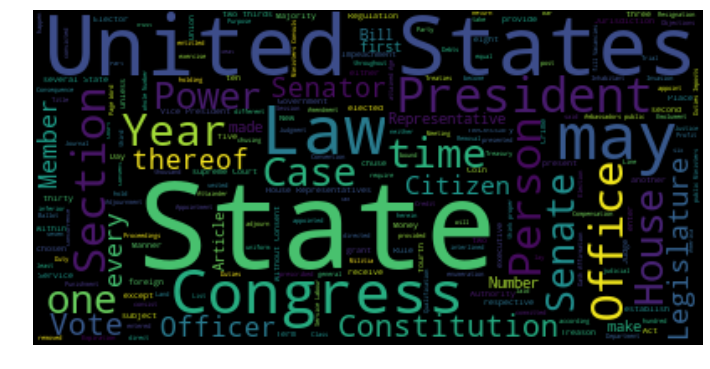

In [15]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

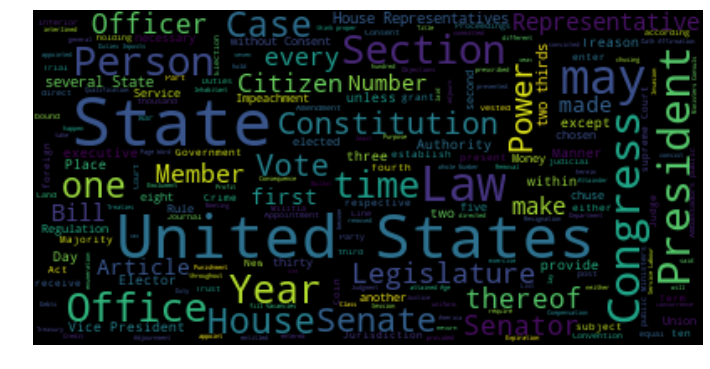

In [16]:
# 단어별 빈도 계산
wordcloud=WordCloud(max_font_size=40).generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# 의미없는 단어는 지우기(ex. 대통령연설에서 국민, 여러분 등등)
# 사전에 제거해도 되고, 사후에 제거해도됨
# 일단 정리해서 단어빈도는 해놓고 wordcloud그릴때만 제외해도무방

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# 이미지 불러오기
alice_mask=np.array(Image.open("class_data/ch02/alice_mask.png"))

# 삭제할 단어와 추가
stopwords=set(STOPWORDS)
stopwords.add("said")

# 텍스트 파일 불러오기
text=open("class_data/ch02/constitution.txt").read()

# 단어별 빈도 계산(공백으로 분리된 단어)
wordcloud=WordCloud(background_color="white", max_words=2000, mask=alice_mask,
                   stopwords=stopwords)
wordcloud=wordcloud.generate(text)

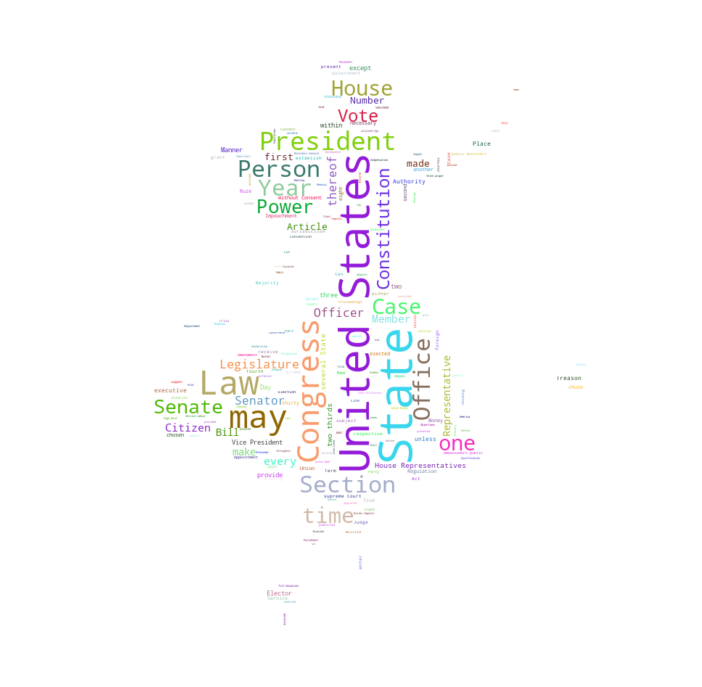

In [8]:
# 색상 함수
r=lambda:np.random.randint(0,255)
# color=lambda:(r(),r(),r())
def wc_color(word,font_size,position,orientation,randomstate=None,**kwargs):
    return(r(),r(),r())

# 워드클라우드 작성
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=wc_color,random_state=2),
          interpolation="bilinear")
plt.axis("off")
plt.show()

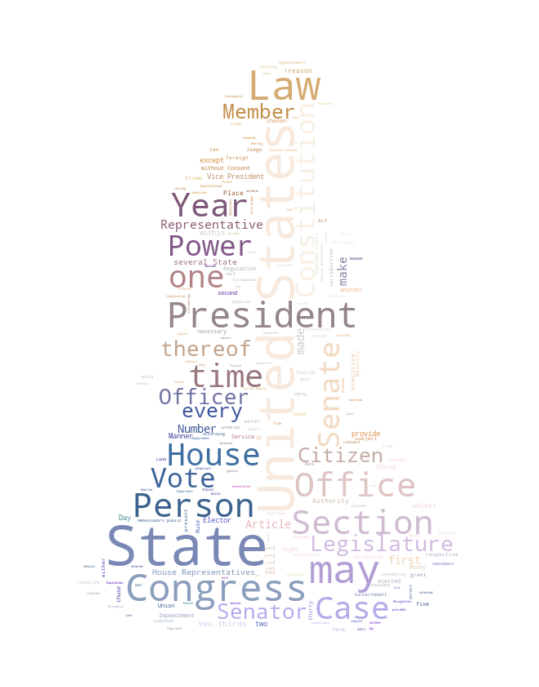

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator # 이미지에서 색 추출

# 이미지 불러오기
alice_color=np.array(Image.open("class_data/ch02/alice_color.png"))
image_colors=ImageColorGenerator(alice_color) # 이미지에서 색 추출

# 삭제할 단어와 추가
stopwords=set(STOPWORDS)
stopwords.add("said")

# 텍스트 파일 불러오기
text=open("class_data/ch02/constitution.txt").read()

# 단어별 빈도 계산(공백으로 분리된 단어)
wordcloud=WordCloud(background_color="white",max_words=2000,mask=alice_color,
                   stopwords=stopwords)
wordcloud=wordcloud.generate(text)

#워드클라우드 작성
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors),interpolation="bilinear")
plt.axis("off")
plt.show()

In [5]:
import nltk
from konlpy.corpus import kolaw
from konlpy.tag import Twitter
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator # 이미지에서 색 추출

o=Okt()

# 텍스트 파일 불러오기
ko_con_text=open("class_data/ch02/speech.txt",encoding="utf-8").read()
ko_con_text

# 명사 추출
tokens_ko=o.nouns(ko_con_text)
tokens_ko

# 단어 삭제
stop_words=[]
f=open("class_data/ch02/stop_word.txt",encoding="utf-8")
lines=f.readlines()
for x in lines:
    stop_words.append(x.strip())
stop_words
tokens_ko=[each_word for each_word in tokens_ko if each_word not in stop_words]
tokens_ko



C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


['안녕하십니까',
 '기자',
 '새해',
 '계획',
 '새해',
 '소망',
 '모두',
 '지난해',
 '국가',
 '모두',
 '매우',
 '북핵',
 '위기',
 '글로벌',
 '사건',
 '신용',
 '불량',
 '증가',
 '가계부채',
 '문제',
 '이라크전쟁',
 '사스',
 '공포',
 '부안',
 '사태',
 '정말',
 '뿐',
 '외환위기',
 '이후',
 '일자리',
 '크게',
 '소득',
 '격차',
 '서민',
 '더욱',
 '여기',
 '불법',
 '대선',
 '자금',
 '문제',
 '주변',
 '허물',
 '실망',
 '다시',
 '한번',
 '송구',
 '말씀',
 '이제',
 '터널',
 '거의',
 '희망',
 '빛',
 '난관',
 '남아',
 '희망',
 '발',
 '발',
 '자신감',
 '자신',
 '지난해',
 '가운데',
 '서도',
 '성과',
 '적지',
 '전쟁',
 '위기',
 '북핵',
 '위기',
 '자',
 '회담',
 '평화',
 '해결',
 '가닥',
 '한반도',
 '전쟁',
 '온',
 '의지',
 '정부',
 '외교',
 '성과',
 '전',
 '세계',
 '이라크전쟁',
 '사스',
 '확산',
 '불구',
 '평온',
 '유지',
 '정부',
 '합심',
 '협력',
 '결과',
 '글로벌',
 '사건',
 '카드',
 '채',
 '문제',
 '금융시장',
 '충격',
 '고비',
 '서민',
 '걱정',
 '부동산',
 '투기',
 '열풍',
 '부동산대책',
 '이후',
 '안정',
 '기업',
 '근로자',
 '불황',
 '속',
 '달러',
 '수출',
 '실적',
 '기록',
 '경제',
 '참으로',
 '업적',
 '고통',
 '참고',
 '협력',
 '진심',
 '감사',
 '기업인',
 '근로자',
 '경의',
 '표',
 '올해',
 '수출',
 '달러',
 '시대',
 '경제',
 '거울',
 '주식시장',
 '연초',
 '희망',
 '찬',
 '출발',
 '투자

In [ ]:
sel_word=nltk.Text(tokens_ko) #분할했던 것을 다시 합치기
data=sel_word.vocab().most_common(1000)
tmp_data=dict(data)

# 단어별 빈도 계산 (공백으로 분리된 단어)
wordcloud=WordCloud(font_path="C:/Windows/Fonts/malgun.TTF",
                   background_color="white")
wordcloud=wordcloud.generate_from_frequencies(tmp_data)

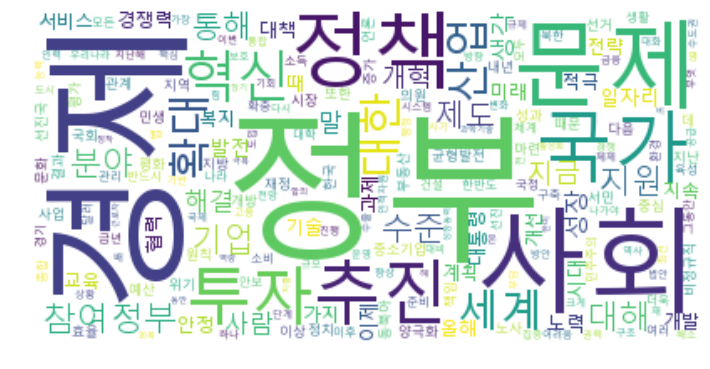

In [21]:
# 워드클라우드 작성
plt.figure(figsize=(12,12))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

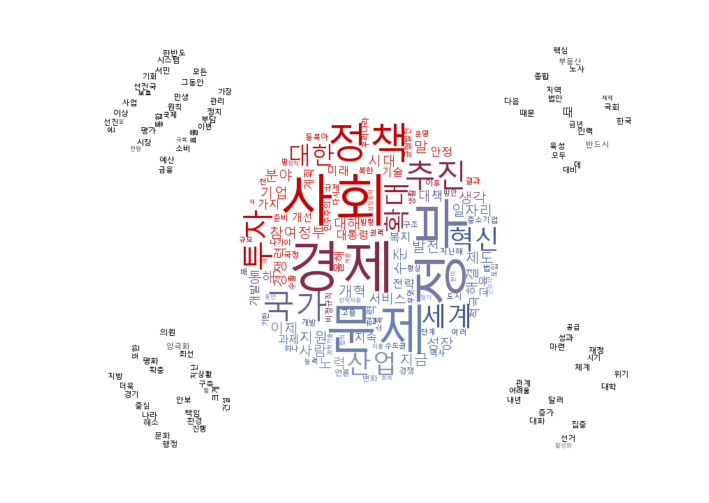

In [25]:
# 이미지 불러오기
korea_color=np.array(Image.open("class_data/ch02/south-korea-flag.png"))
image_colors=ImageColorGenerator(korea_color) # 이미지에서 색 추출

# 단어별 빈도 계산 (공백으로 분리된 단어)
wordcloud=WordCloud(font_path="C:/Windows/Fonts/malgun.TTF", relative_scaling=0.2,
                   mask=korea_color, background_color="white",
                   min_font_size=1, max_font_size=80)
wordcloud=wordcloud.generate_from_frequencies(tmp_data)

# 워드클라우드 작성
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

In [15]:
import codecs
from bs4 import BeautifulSoup
from konlpy.tag import Okt
from gensim.models import word2vec

# utf-16 인코딩으로 파일을 열고 글자를 출력하기
fp=codecs.open("class_data/ch02/BEXX0003.txt","r",encoding="utf-16")
soup=BeautifulSoup(fp,"html.parser")
body=soup.select_one("body>text")
text=body.getText()

# 텍스트를 한 줄씩 처리하기
ok=Okt()
results=[]
lines=text.split("\r\n") #여기까지는 위와 동일
for line in lines:
    # 형태소 분석하기
    # 단어의 기본형 사용
    malist=ok.pos(line,norm=True,stem=True)
    r=[]
    for word in malist:
        # 어미/조사/구두점 등은 대상에서 제외
        if not word[1] in ["Josa","Eomi","Punctuation"]:
            r.append(word[0])
    rl=(" ".join(r)).strip() 
    # string을 join하는데, 한칸씩 띄우면서 join하기 # strip() : 양쪽 공백, \n 지우기 
    results.append(rl)
    print(rl)
    
# 파일로 출력하기
wakati_file="toji.wakati"
with open(wakati_file, "w", encoding="utf-8") as fp:
    fp.write("\n".join(results))
    
# Word2Vec 모델 만들기
data=word2vec.LineSentence(wakati_file) # 텍스트 읽어 들이기
model=word2vec.Word2Vec(data, size=200, window=10, hs=1, min_count=2, sg=1) #모델 생성
model.save("class_data/ch02/toji.model")
print("ok")

제 1 편 어둠 발 소리 
 서다 序 
 1897년 의 한가위 
 까치 들 울타리 안 감나무 오다 아침 인사 하다 전 무색 옷 댕기 꼬리 늘 아이 들 송편 입 물 마을 길 쏘다 기쁘다 날뛰다 어른 들 해 중천 좀 기울어지다 무렵 이 래야 차례 치르다 하다 성묘 하다 하다 이웃 끼리 음식 나누다 보다 한나절 넘다 이 때 타 작 마당 사람 들 모 이기 시작 들뜨다 시작 남정 노인 들 아낙 들 채비 아무래도 더디다 그렇다 수 없다 것 식구 들 시중 음식 간수 끝내다 제 자신 치장 남아 있다 이 바람 고개 무겁다 벼 이삭 황금 빛 물결 이루다 들판 마음 놓다 새 떼 들 모여들다 풍 성하다 향연 벌이다 
 후우 이이 이 놈 새 떼 들 극성 새 쫓다 할망구 와삭 와삭 풀발 선 출입 옷 갈아입다 타 작 마당 굿 보고 있다 것 추석 마을 남녀 노유 사람 들 뿐 아니다 강아지 돼지 소나 말 새 들 시궁창 드나들다 쥐 새끼 포식 날인 보다 
 빠르다 장단 꽹과리 소리 느리다 장단 둔중하다 여음 울리다 징 소리 타 작 마당 거리 멀다 최 참판 댁 사랑 흐느낌 슬프다 들려오다 농부 들 지금 꽃 달리다 고깔 흔들다 신명 내다 괴롭다 하다 일상 日常 잊다 굿 놀이 열중 있다 것 최 참판 댁 섭섭찮 전곡 錢穀 이 나가다 풍년 미치다 못 하다 실하다 평작 임 틀림 없다 것 모처럼 허리 끈 풀다 쌀밥 식구 들 배 두드리다 테 하루 근심 잊다 만 하다 것 
 이 날 수 수 개비 꺾다 아이 들 매 맞다 않다 여러 달 솟다 증 素症 풀다 느긋하다 늙은이 들 뒷간 출입 잦다 힘 좋다 젊은이 들 벌써 읍내 가다 없다 황소 하다 마리 끌 돌아오다 꿈 꾸미다 읍내 씨름판 몰리다 간 것 
 최 참판 댁 사랑 무인 지경 적막하다 햇빛 맑다 뜰 비치다 사람 들 모두 어디 가버리다 새롭다 바르다 방문 장지 낯설다 
 한동안 타 작 마당 굿 놀이 멎다 것 같다 별안간 경 풍 들리다 것 꽹과리 악 쓴다 빠르다 드높다 꽹과리 따르다 징 소리 빨르다 깨깽 깨애깽 덥다 응응 음 깨깽 깨애깽 덥다 응응 음 장구 북 사이

C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


ok


C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [16]:
model=word2vec.Word2Vec.load("class_data/ch02/toji.model")
model.most_similar("땅") # 입력한 단어와 유사한 단어 
# 각 이라는 단어는 의미가 없으므로 제거해도됨!

C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('꾼', 0.8987160325050354),
 ('각', 0.8922512531280518),
 ('불리', 0.8696142435073853),
 ('원귀', 0.86937016248703),
 ('누님', 0.8677431344985962),
 ('지난해', 0.8658044934272766),
 ('골골', 0.8639317750930786),
 ('조상', 0.8637441396713257),
 ('송장', 0.8636597990989685),
 ('백', 0.8632980585098267)]

In [17]:
model.similarity("땅", "조상") # 두 단어 사이의 유사도

C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.86374414

In [18]:
# (땅+조상-젊은이) 선형결과
model.most_similar(positive=["땅","조상"], negative=["젊은이"], topn=2)

C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('때기', 0.8189287185668945), ('송장', 0.8162503838539124)]

In [13]:
import math,sys
from konlpy.tag import Okt
class BayesianFilter:
    """베이지안 필터"""
    def _init_(self): # 객체를 정의할 때 자동으로 생성되는 속성들
        self.words=set() # 출현한 단어 기록
        self.word_dict={}  # 카테고리마다의 출현 횟수 기록
        self.category_dict={} # 카테고리 출현 횟수 기록
        
    # 형태소 분석하기
    def split(self, text): #droptext도 추가하는게 필요해보인다...
        results=[]
        ok=Okt()
        # 단어의 기본형 사용
        malist=ok.pos(text,norm=True,stem=True)
        for word in malist:
            # 어미/조사/구두점 등은 대상에서 제외
            if not word[1] in ["Josa","Eomi","Punctuation"]:
                results.append(word[0])
        return results
    
    # 단어와 카테고리의 출현 횟수 세기
    def inc_word(self,word,category):
        # 단어를 카테고리에 추가하기
        if not category in self.word_dict:
            self.word_dict[category]={}
        if not word in self.word_dict[category]:
            self.word_dict[category][word]=0
        self.word_dict[category][word]+=1
        self.words.add(word) # 집합이니깐 동일한 단어 들어가면 무시됨
        
    def inc_category(self,category):
        # 카테고리 계산하기
        if not category in self.category_dict:
            self.category_dict[category]=0
        self.category_dict[category]+=1
        
    # 텍스트 학습하기
    def fit(self, text, category):
        """텍스트 학습"""
        word_list=self.split(text)
        for word in word_list:
            self.inc_word(word,category)
        self.inc_category(category)
        
    # 단어 리스트에 점수 매기기
    def score(self, words, category):
        score=math.log(self.category_prob(category))
        for word in words:
            score+=math.log(self.word_prob(word,category))
        return score
    
    # 예측하기
    def predict(self,text):
        best_category=None
        max_score=-sys.maxsize
        words=self.split(text)
        score_list=[]
        for category in self.category_dict.keys():
            score=self.score(words,category)
            score_list.append((category,score))
            if score>max_score:
                max_score=score
                best_category=category
        return best_category, score_list
    
    # 카테고리 내부의 단어 출현 횟수 구하기
    def get_word_count(self,word,category):
        if word in self.word_dict[category]:
            return self.word_dict[category][word]
        else:
            return 0
        
    # 카테고리 계산
    def category_prob(self,category):
        n=self.get_word_count(word,category)+1
        d=sum(self.word_dict[category].values())+len(self.words)
        return n/d
    
    # 카테고리 내부의 단어 출현 비율 계산
    def word_prob(self,word,category):
        n=self.get_word_count(word,category)+1
        d=sum(self.word_dict[category].values())+len(self.words)
        return n/d

AttributeError: 'BayesianFilter' object has no attribute 'word_dict'

In [24]:
# from bayes import BayesianFilter
bf=BayesianFilter()

# 텍스트 학습
bf.fit("파격 세일 - 오늘까지만 30% 할인","광고")
bf.fit("쿠폰 선물 & 무료 배송","광고")
bf.fit("현대 백화점 세일","광고")
bf.fit("봄과 함께 찾아온 따뜻한 신제품 소식","광고")
bf.fit("인기 제품 기간 한정 세일","광고")
bf.fit("오늘 일정 확인","중요")
bf.fit("프로젝트 진행 상황 보고","중요")
bf.fit("계약 잘 부탁드립니다","중요")
bf.fit("회의 일정이 등록되었습니다.","중요")
bf.fit("오늘 일정이 없습니다.","중요")

# 예측
pre,scorelist=bf.predict("재고 정리 할인, 무료 배송")
print("결과=",pre)
print(scorelist)


결과= 광고
[('광고', -19.16807495974667), ('중요', -20.449365773467083)]


In [26]:
import sys
from konlpy.tag import Okt
import math

class BayesianFilter:
    def __init__(self):
        self.words = set()
        self.word_dict = {}
        self.category_dict = {}
    def split(self, text):
        result = []
        ok = Okt()
        malist = ok.pos(text, norm = True, stem = True)
        for word in malist:
            if not word[1] in ['Josa', 'Eomi', 'Punctuation']:
                result.append(word[0])
        return result
    def inc_word(self, word, category):
        if not category in self.word_dict:
            self.word_dict[category] = {}
        if not word in self.word_dict[category]:
            self.word_dict[category][word] = 1
        else:
            self.word_dict[category][word] +=1
        self.words.add(word)
    def inc_category(self, category):
        if not category in self.category_dict:
            self.category_dict[category] = 0
        self.category_dict[category] +=1
    def fit(self, text, category):
        word_list = self.split(text)
        for word in word_list:
            self.inc_word(word, category)
        self.inc_category(category)
    def score(self, words, category):
        score = math.log(self.category_prob(category))
        for word in words:
            score += math.log(self.word_prob(word, category))
        return score
    def predict(self, text):
        best_category = None
        max_score = -sys.maxsize
        words = self.split(text)
        score_list = list()
        for category in self.category_dict.keys():
            score = self.score(words, category)
            score_list.append((category, score))
            if score>max_score:
                max_score = score
                best_category = category
        return best_category, score_list
    def get_word_count(self, word, category):
        if word in self.word_dict[category]:
            return self.word_dict[category][word]
        else:
            return 0
    def category_prob(self,category):
        sum_categories = sum(self.category_dict.values())
        category_v = self.category_dict[category]
        return category_v/sum_categories
    def word_prob(self, word, category):
        n = self.get_word_count(word,category) +1
        d = sum(self.word_dict[category].values()) + len(self.words)
        return n/d

In [28]:
# spam과 ham 메일 분류
from pandas import Series, DataFrame
from numpy import nan as NA
import pandas as pd
import numpy as np
# from bayes import BayesianFilter

df=pd.read_csv("class_data/ch02/sms_spam.csv",header=0,encoding="ansi")
df.head(7)

# 베이지안 필터 학습
bf=BayesianFilter()
for i in df.index:
    bf.fit(df.text[i],df.type[i])
    
# 예측
df_test=pd.read_csv("class_data/ch02/sms_spam_test.csv",header=0,encoding="ansi")
print(df_test.head(7),"\n")

predicted=[]
for x in df_test.text:
    pre, scorelist=bf.predict(x)
    predicted.append(pre)
    print("예측 결과 : {0}".format(pre))
    print("예측 점수\n",scorelist,"\n")
print(predicted,"\n")

df_test["predict"]=predicted
print("예측률:{0:5.1f}".format(df_test.type.eq(df_test.predict).mean()*100))
df_test.head(7)

   type                                               text
0  spam  Free msg: Single? Find a partner in your area!...
1  spam  Want to funk up ur fone with a weekly new tone...
2   ham  Even my brother is not like to speak with me. ...
3   ham  Wow. I never realized that you were so embaras...
4  spam  URGENT This is our 2nd attempt to contact U. Y...
5   ham           Yes..gauti and sehwag out of odi series.
6  spam  Free Msg: Ringtone!From: http://tms. widelive.... 

예측 결과 : spam
예측 점수
 [('ham', -253.26336787943671), ('spam', -219.50440600523493)] 

예측 결과 : spam
예측 점수
 [('ham', -246.76792140374928), ('spam', -207.6443336201288)] 

예측 결과 : ham
예측 점수
 [('ham', -109.56355145389888), ('spam', -130.50297964520914)] 

예측 결과 : ham
예측 점수
 [('ham', -380.45210126700283), ('spam', -475.12755379672154)] 

예측 결과 : spam
예측 점수
 [('ham', -249.62222459285147), ('spam', -192.98671330402118)] 

예측 결과 : ham
예측 점수
 [('ham', -64.03626327656411), ('spam', -71.43383444654606)] 

예측 결과 : spam
예측 점수
 [('ham',

,type,text,predict
0,spam,Free msg: Single? Find a partner in your area!...,spam
1,spam,Want to funk up ur fone with a weekly new tone...,spam
2,ham,Even my brother is not like to speak with me. ...,ham
3,ham,Wow. I never realized that you were so embaras...,ham
4,spam,URGENT This is our 2nd attempt to contact U. Y...,spam
5,ham,Yes..gauti and sehwag out of odi series.,ham
6,spam,Free Msg: Ringtone!From: http://tms. widelive....,spam


In [14]:
# 레벤슈타인 거리 구하기
def calc_distance(a,b):
    """ 레벤슈타인 거리 계산하기"""
    if a==b: return 0
    a_len=len(a)
    b_len=len(b)
    if a=="":return b_len
    if b=="":return a_len
    
    # 2차원 표 (a_len+1, b_len+1) 준비하기
    matrix=[[] for i in range(a_len+1)]
    for i in range(a_len+1): # 0으로 초기화
        matrix[i]=[0 for j in range(b_len+1)]
    # 0 일때 초깃값 설정
    for i in range(a_len+1):
        matrix[i][0]=i
    for j in range(b_len+1):
        matrix[0][j]=j
    # 표 채우기
    for i in range(1, a_len+1):
        ac=a[i-1]
        for j in range(1,b_len+1):
            bc=b[j-1]
            cost=0 if (ac==bc) else 1
            matrix[i][j]=min([
                matrix[i-1][j]+1,
                matrix[i][j-1]+1,
                matrix[i-1][j-1]+cost
            ])
    return matrix[a_len][b_len]

# "가나다라"와 "가마바라"의 거리
print(calc_distance("가나다라","가마바라"))

# 지하철 역 유사 정도
samples=["신촌역","신천군","신천역","신발","마곡역"]
base=samples[0]
r=sorted(samples,key=lambda n: calc_distance(base,n))
for n in r:
    print(calc_distance(base,n),n)
            

2
0 신촌역
1 신천역
2 신천군
2 신발
2 마곡역


In [16]:
# 문장을 N-gram으로 나누기
def ngram(s,num):
    res=[]
    slen=len(s)-num+1
    for i in range(slen):
        ss=s[i:i+num]
        res.append(ss)
    return res

# 두 문장의 유사도 측정
def diff_ngram(sa,sb,num):
    a=ngram(sa,num)
    b=ngram(sb,num)
    r=[]
    cnt=0
    for i in a:
        for j in b:
            if i==j:
                cnt+=1
                r.append(i)
    return cnt/len(a), r

In [18]:
a="파이썬으로 하는 빅데이터 분석과 머신러닝은 매우 쉽습니다."
b="빅데이터 분석과 머신러닝은 파이썬을 이용하여 매우 쉽게 할 수 있습니다."

# 2-gram 유사도
r_2gram, word_2gram = diff_ngram(a,b,2)
print("2-gram:",r_2gram, word_2gram)

# 3-gram 유사도
r_3gram, word_3gram = diff_ngram(a,b,3)
print("3-gram:",r_3gram, word_3gram)


2-gram: 0.7419354838709677 ['파이', '이썬', '빅데', '데이', '이터', '터 ', ' 분', '분석', '석과', '과 ', ' 머', '머신', '신러', '러닝', '닝은', '은 ', ' 매', '매우', '우 ', ' 쉽', '습니', '니다', '다.']
3-gram: 0.6333333333333333 ['파이썬', '빅데이', '데이터', '이터 ', '터 분', ' 분석', '분석과', '석과 ', '과 머', ' 머신', '머신러', '신러닝', '러닝은', '닝은 ', ' 매우', '매우 ', '우 쉽', '습니다', '니다.']
